#                                  INTEGRATED CASE STUDY

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

In [3]:
#import data set 
sale_data = pd.read_csv("C:/Users/lenovo/Desktop/py/Sales_Shipment_Data.csv")
inventory_data = pd.read_csv("C:/Users/lenovo/Desktop/py/Inventory_Stock_Data.csv")

# DATA AUDIT 

In [97]:
#1. Number of rows & Number of columns
# 180519 rows 
#46 columns

In [3]:
#2 Number of numerical & categorical columns
categorical_columns = sale_data.select_dtypes(include='object').columns
num_categorical_columns = len(categorical_columns)
numerical_columns = sale_data.select_dtypes(include=['number']).columns
num_numerical_columns = len(numerical_columns)

# Display the counts
print("Number of Categorical Columns:", num_categorical_columns)
print("Number of Numerical Columns:", num_numerical_columns)

Number of Categorical Columns: 22
Number of Numerical Columns: 24


In [99]:
sale_data

,Product_Category_Id,Category_Name,Class,Customer_City,Customer_Country,Customer_Fname,Customer_Id,Customer_Lname,Customer_Segment,Customer_State,...,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Order_Item_Total,Order_Profit_Per_Order,Product_Price,Sales,Sales_per_customer
0,24,Women's Apparel,Moderate Value-Moderate Number,Roswell,EE. UU.,Jean,5673,Dunn,Corporate,NM,...,0.15,134920,50.000000,0.11,2,85.000000,9.610000,50.000000,100.000000,85.000000
1,24,Women's Apparel,Moderate Value-Moderate Number,Los Angeles,EE. UU.,Rose,9723,White,Corporate,CA,...,0.16,9722,50.000000,0.11,2,84.000000,9.490000,50.000000,100.000000,84.000000
2,24,Women's Apparel,Moderate Value-Moderate Number,Harvey,EE. UU.,Joshua,9511,Brady,Corporate,IL,...,0.06,129954,50.000000,0.33,2,94.500000,30.709999,50.000000,100.000000,94.500000
3,24,Women's Apparel,Moderate Value-Moderate Number,Elmhurst,EE. UU.,Mary,3326,Smith,Corporate,IL,...,0.05,2929,50.000000,0.29,2,95.000000,27.549999,50.000000,100.000000,95.000000
4,24,Women's Apparel,Moderate Value-Moderate Number,North Las Vegas,EE. UU.,Samantha,907,Kline,Corporate,NV,...,0.05,140056,50.000000,0.50,2,95.000000,47.500000,50.000000,100.000000,95.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,17,Cleats,High Value-Small Number,Escondido,EE. UU.,Charles,9615,Smith,Corporate,CA,...,0.16,124746,59.990002,-1.20,5,251.960007,-302.350006,59.990002,299.950012,251.960007
180515,17,Cleats,High Value-Small Number,Seattle,EE. UU.,Richard,1971,Stokes,Corporate,WA,...,0.17,73577,59.990002,0.47,5,248.960007,117.010002,59.990002,299.950012,248.960007
180516,9,Cardio Equipment,High Value-Small Number,Anaheim,EE. UU.,Mary,7663,Smith,Corporate,CA,...,0.25,60910,99.989998,-0.13,5,374.959992,-46.869999,99.989998,499.950012,374.959992
180517,17,Cleats,High Value-Small Number,San Diego,EE. UU.,Mary,415,Allen,Corporate,CA,...,0.13,114288,59.990002,0.48,5,260.959992,125.260002,59.990002,299.950012,260.959992


In [19]:
print("\nSummary statistics for numerical columns:")
print(sale_data.describe())
print("\nSummary statistics for numerical columns:")
print(inventory_data.describe())


Summary statistics for numerical columns:
       Product Category Id    Customer Id  Customer Zipcode  Department Id  \
count        180519.000000  180519.000000     180516.000000  180519.000000   
mean             31.851451    6691.379495      35921.126914       5.443460   
std              15.640064    4162.918106      37542.461122       1.629246   
min               2.000000       1.000000        603.000000       2.000000   
25%              18.000000    3258.500000        725.000000       4.000000   
50%              29.000000    6457.000000      19380.000000       5.000000   
75%              45.000000    9779.000000      78207.000000       7.000000   
max              76.000000   20757.000000      99205.000000      12.000000   

            Order Id     Product Id  Benefit per order  \
count  180519.000000  180519.000000      180519.000000   
mean    36221.894903     692.509764          21.974989   
std     21045.379569     336.446807         104.433526   
min         1.000000  

In [14]:
print("\nMissing values in the dataset:")
print(inventory_data.isnull().sum())
print("\nMissing values in sale_data")
print(sale_data.isnull().sum())


Missing values in the dataset:
order-now        0
product id       0
product name     0
avg lead time    0
avg order qty    0
current stock    0
max lead time    0
max order qty    0
mod              0
reorder point    0
safety stock     0
dtype: int64

Missing values in sale_data
Product Category Id              0
Category Name                    0
Class                            0
Customer City                    0
Customer Country                 0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Delivery Status                  0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Region     

In [20]:
sale_data.dtypes

Product Category Id                int64
Category Name                     object
Class                             object
Customer City                     object
Customer Country                  object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Delivery Status                   object
Department Id                      int64
Department Name                   object
Market                            object
Order City                        object
Order Country                     object
order date (DateOrders)           object
Order Id                           int64
Order Region                      object
Order State                       object
Order Status                      object
Product Id                         int64
Product Name    

In [18]:
print("\nNumber of duplicate rows:")
print(sale_data.duplicated().sum())
print("\nNumber of duplicate rows in inventory data:")
print(inventory_data.duplicated().sum())


Number of duplicate rows:
0

Number of duplicate rows in inventory data:
0


# 4. Detailed EDA - Univariate & Bi Variate analysis for each variable (distributions)

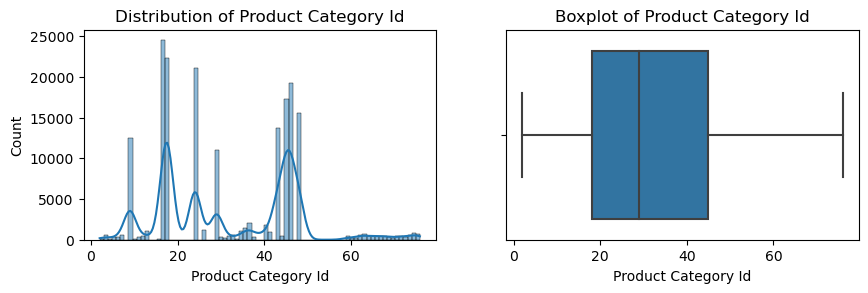

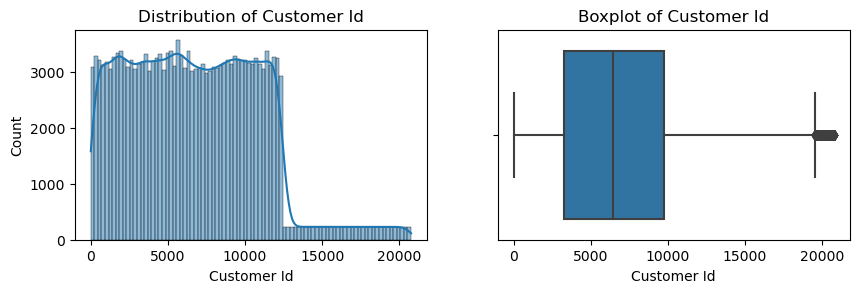

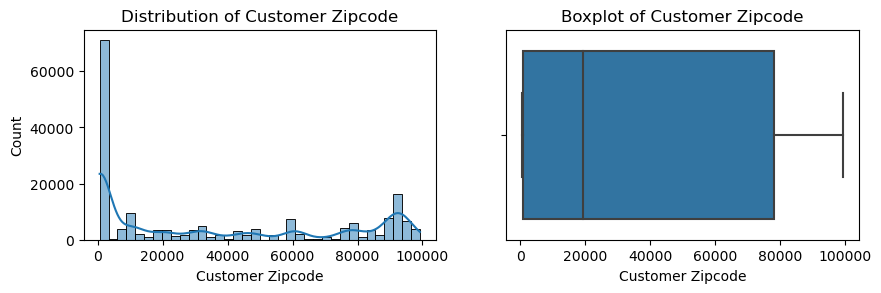

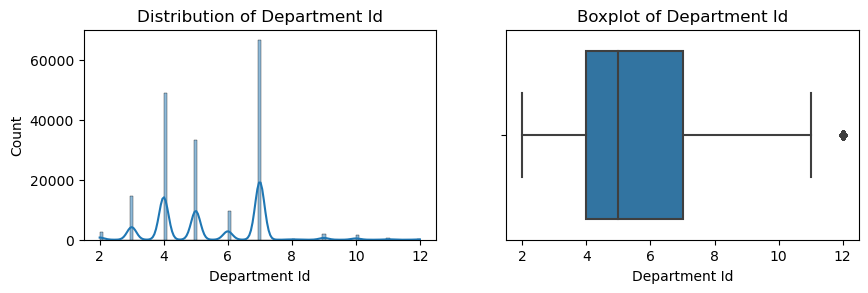

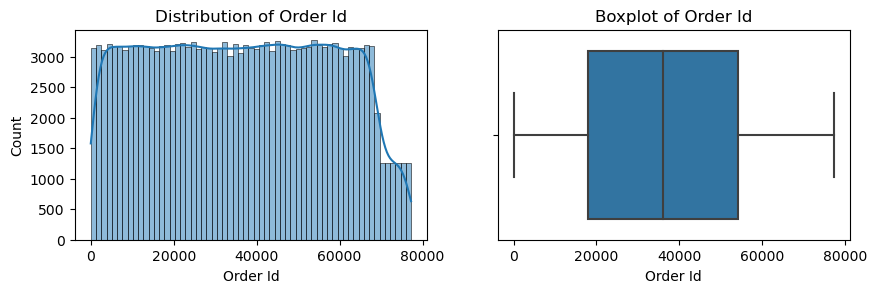

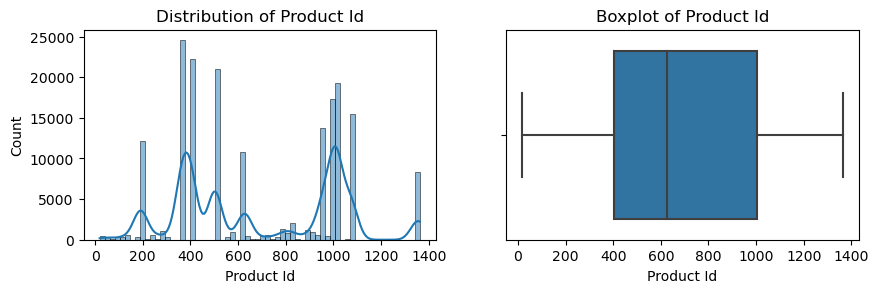

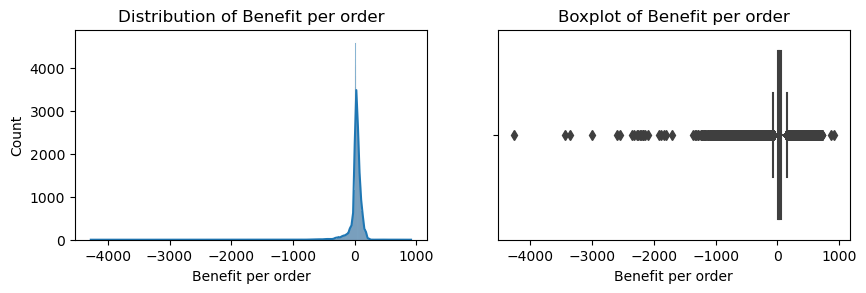

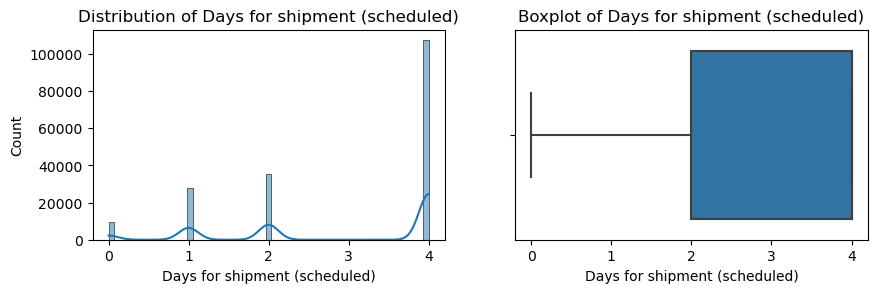

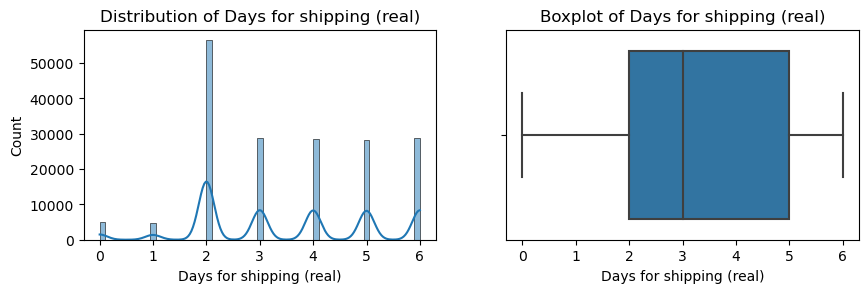

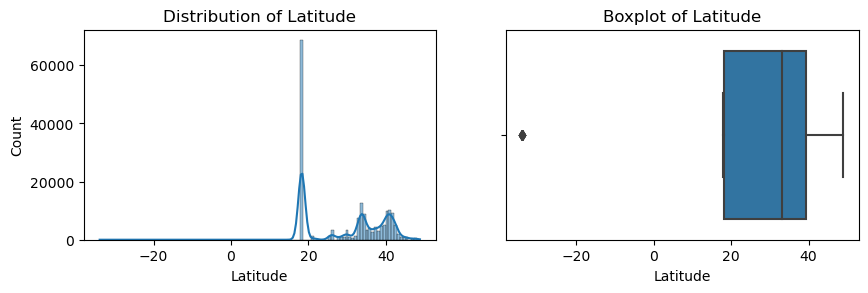

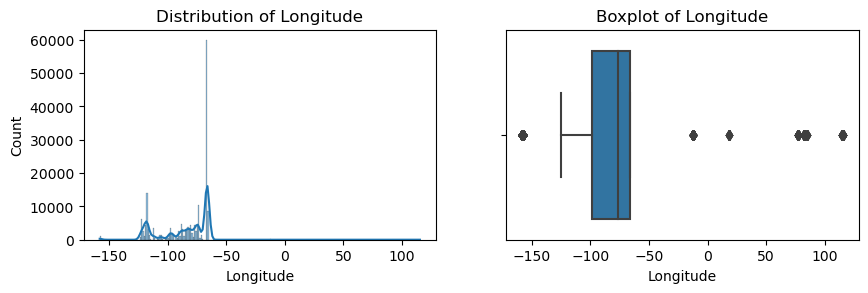

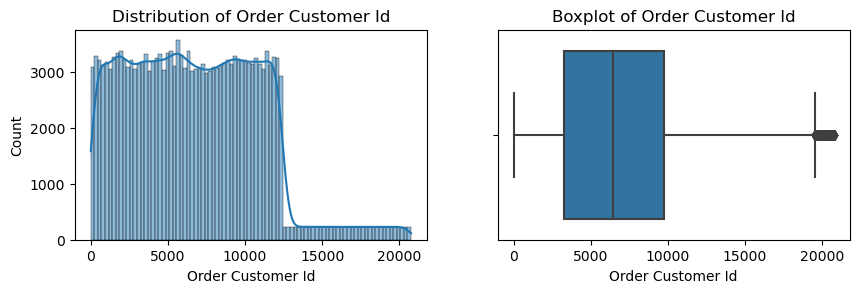

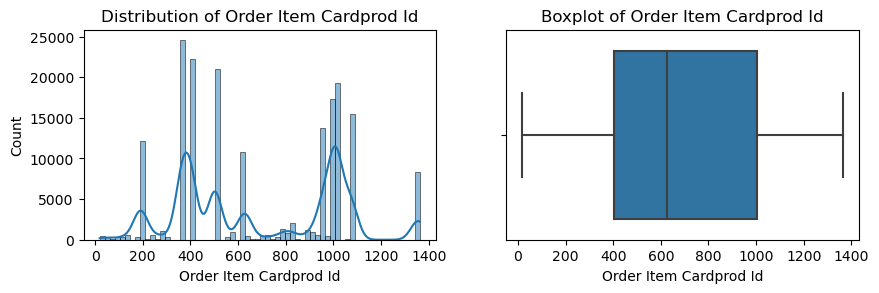

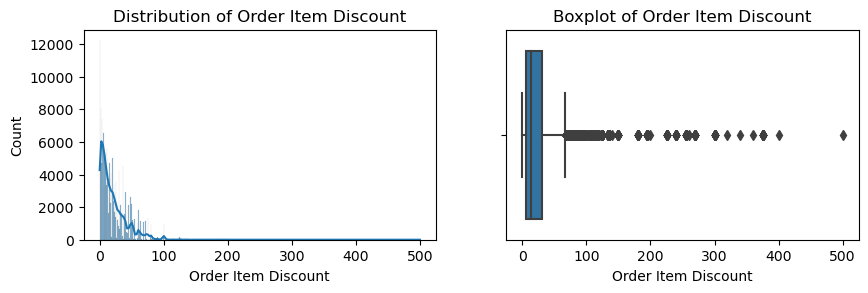

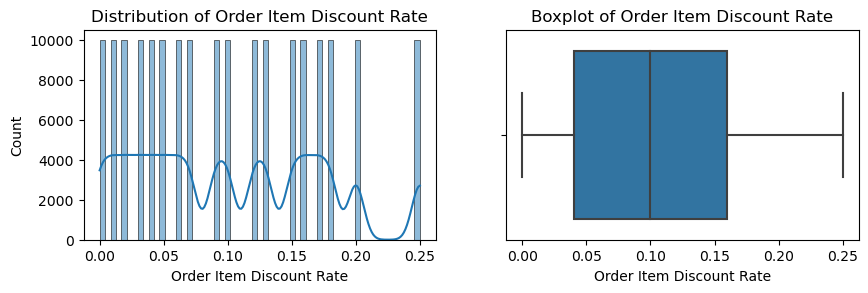

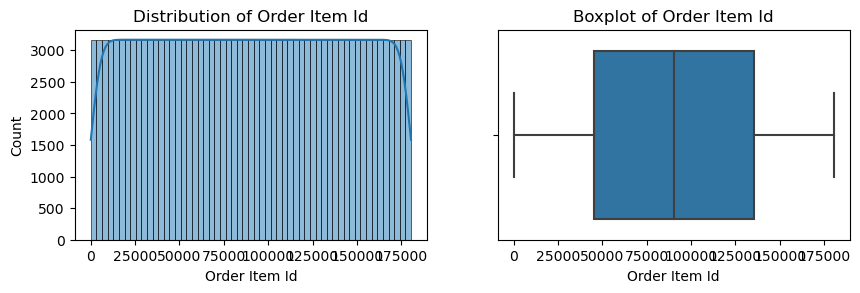

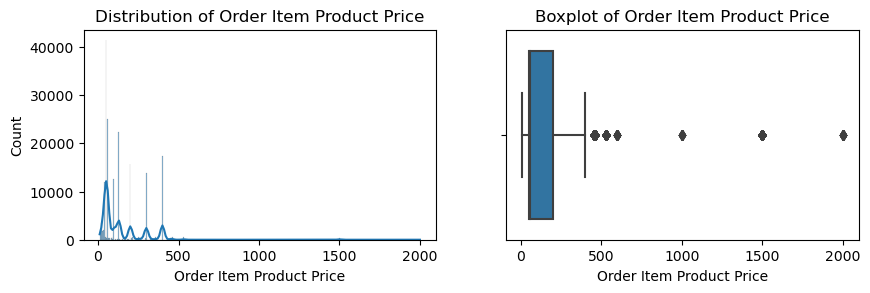

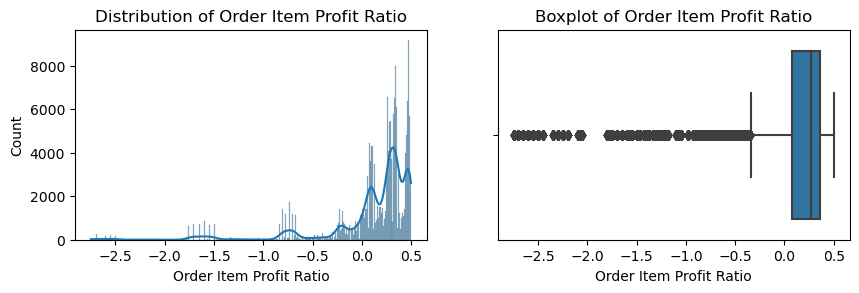

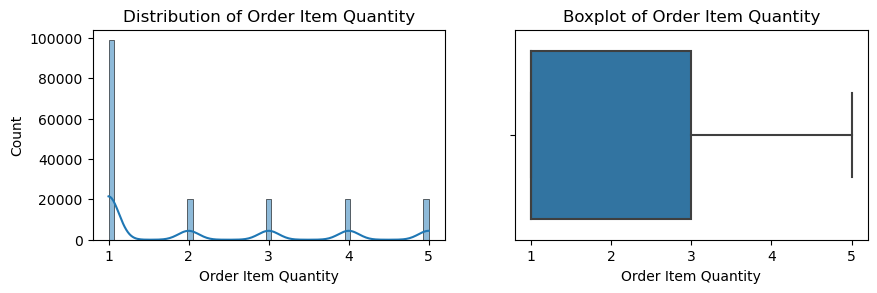

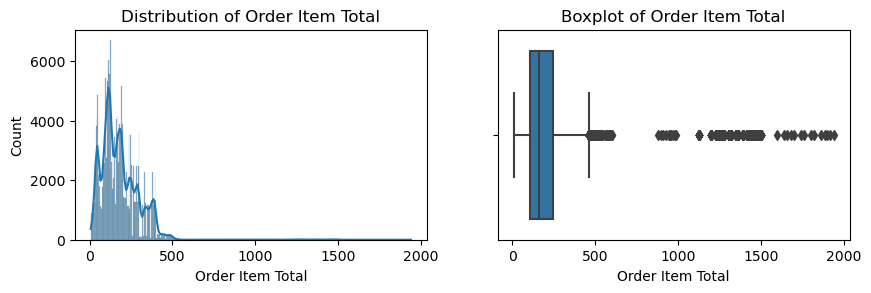

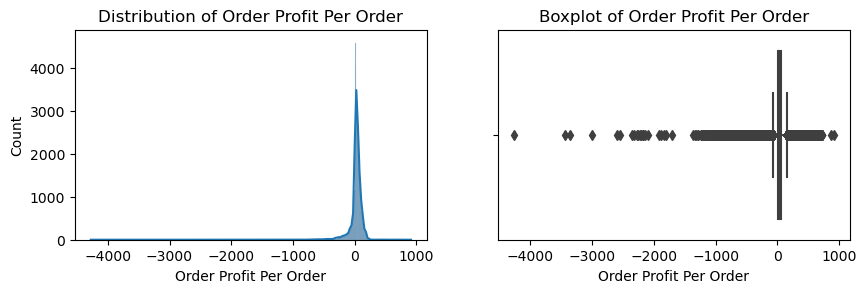

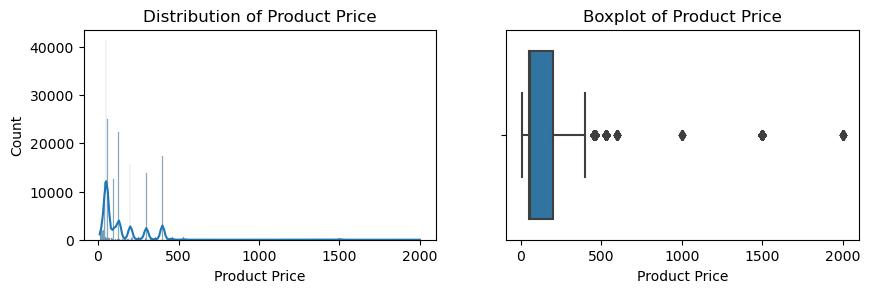

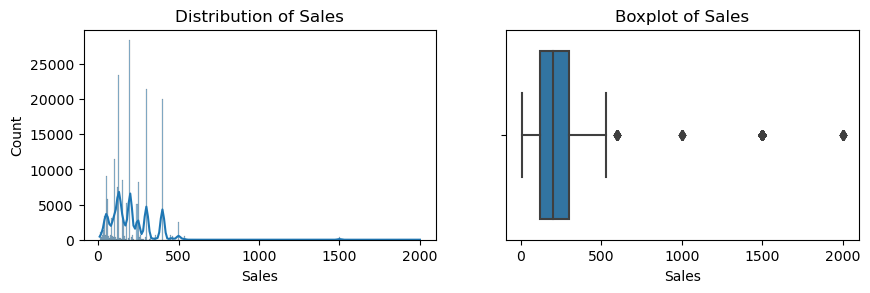

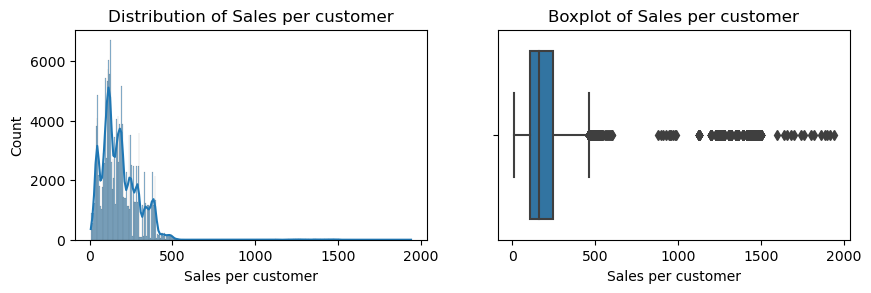

In [22]:
# Select numerical columns
numerical_columns = sale_data.select_dtypes(include=['float64', 'int64']).columns

# Univariate analysis for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 2, 1)
    sns.histplot(sale_data[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(2, 2, 2)
    sns.boxplot(x=sale_data[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

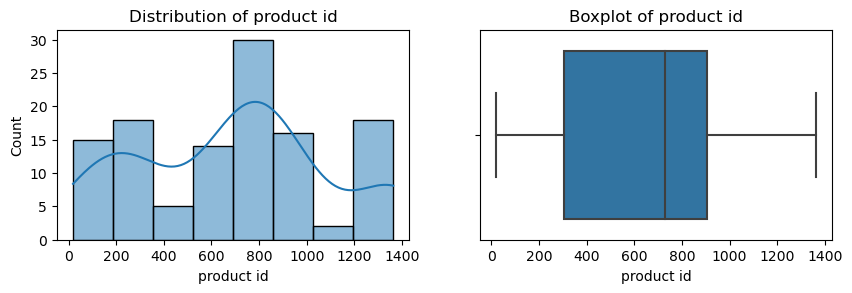

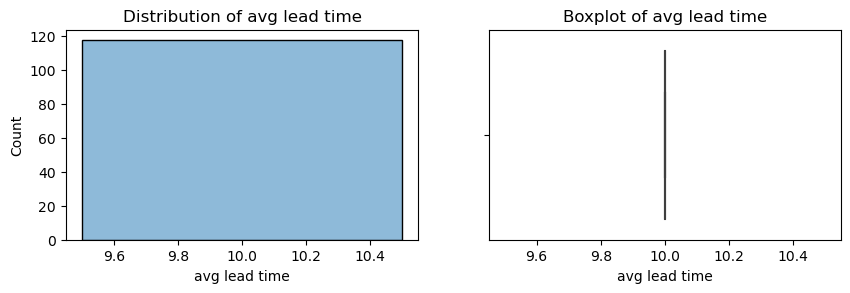

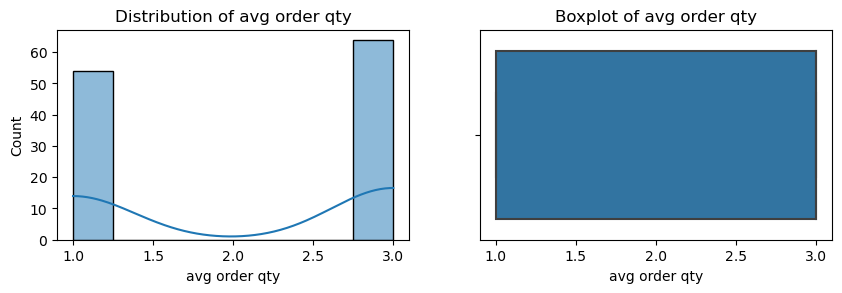

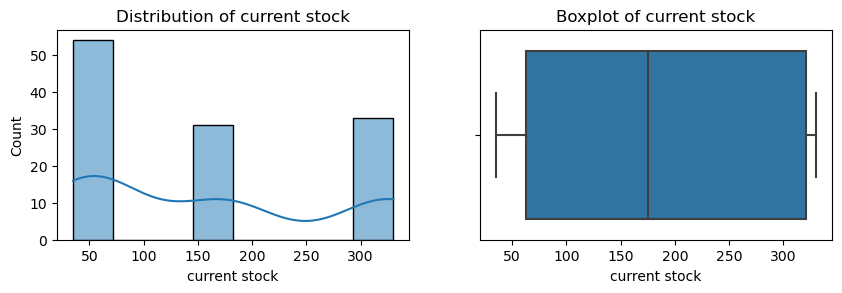

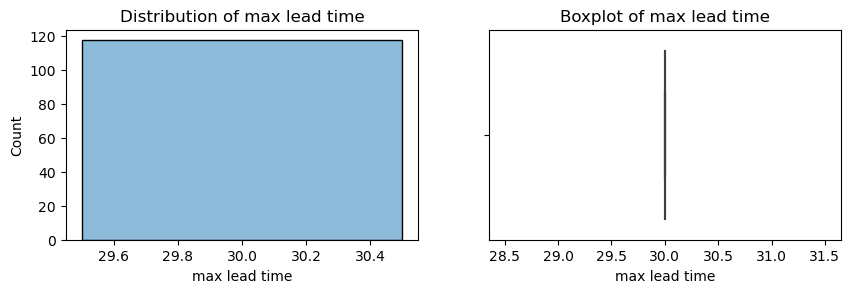

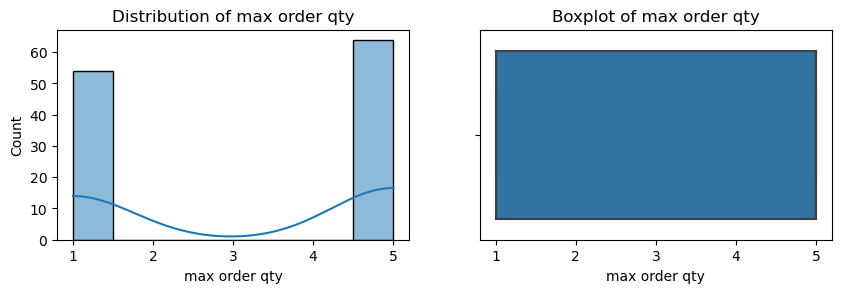

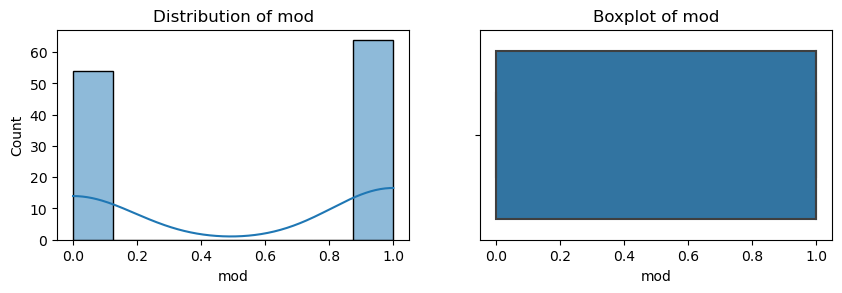

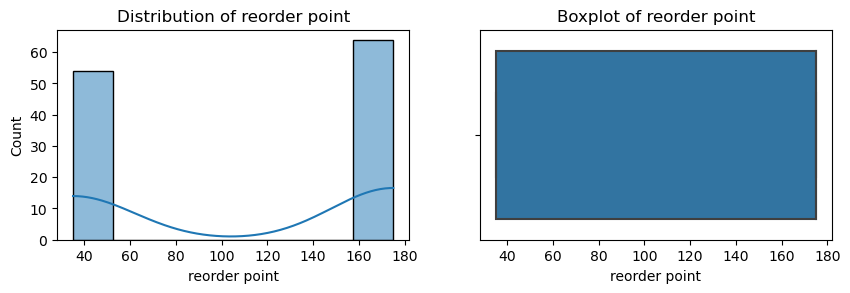

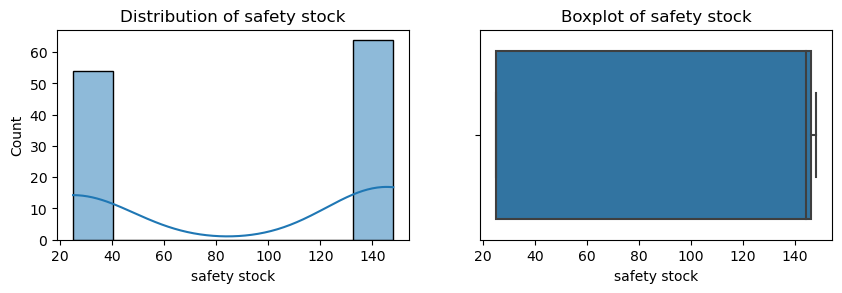

In [23]:
# For inventory data

# Select numerical columns
numerical_columns = inventory_data.select_dtypes(include=['float64', 'int64']).columns

# Univariate analysis for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 2, 1)
    sns.histplot(inventory_data[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(2, 2, 2)
    sns.boxplot(x=inventory_data[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

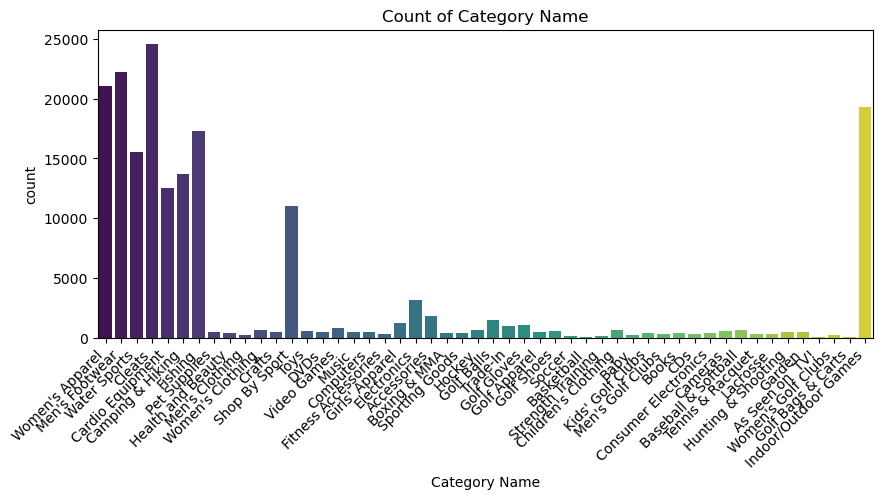

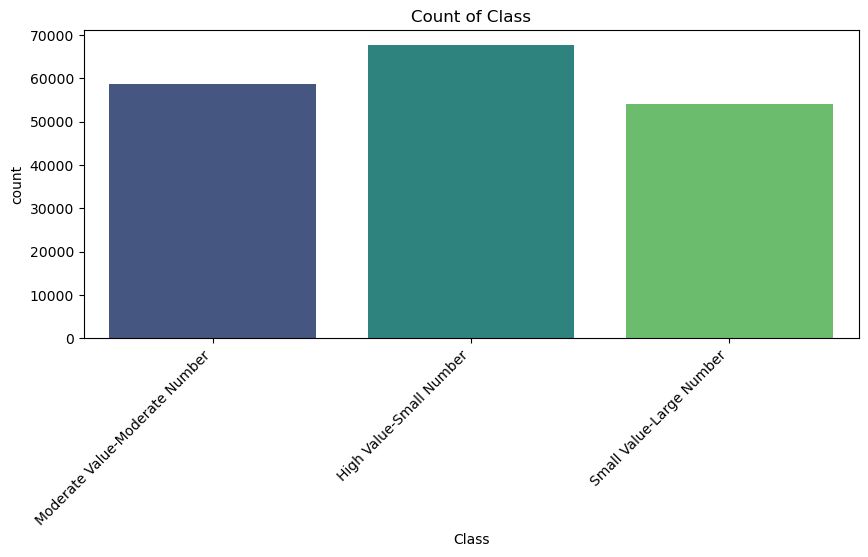

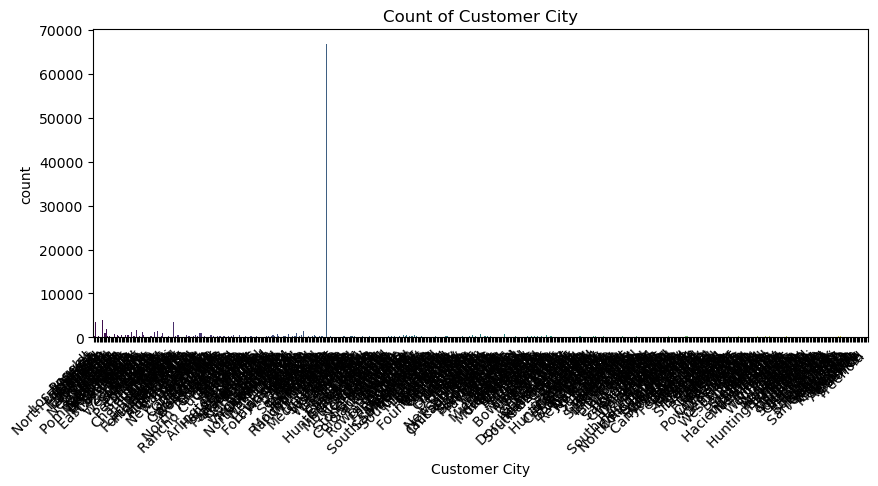

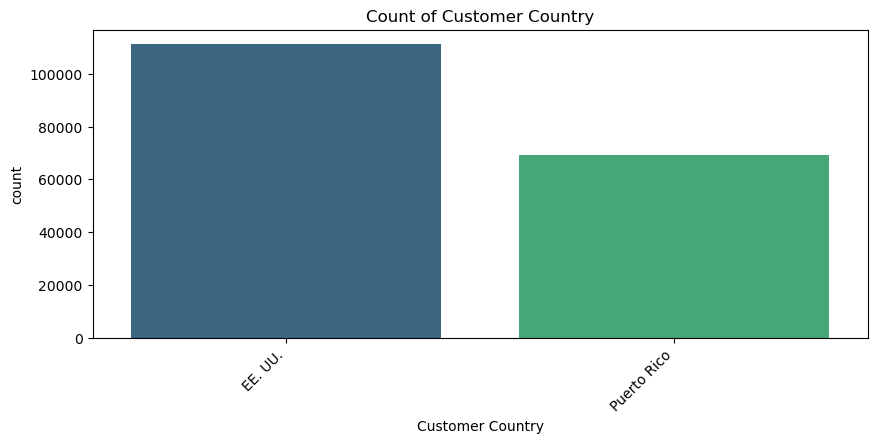

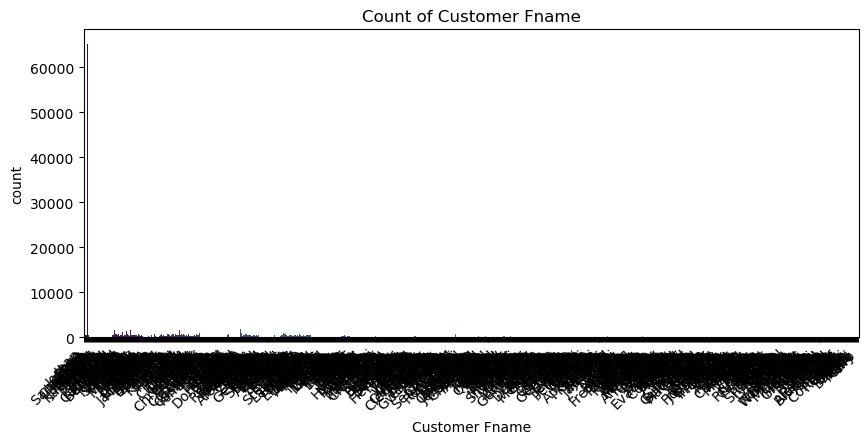

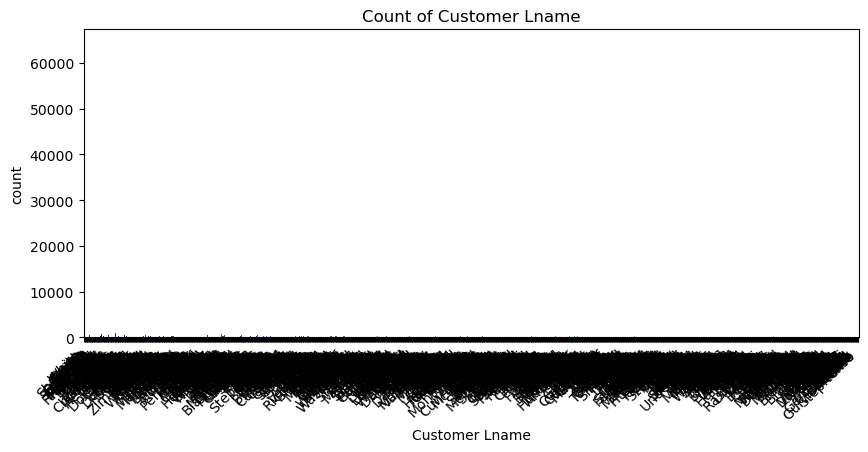

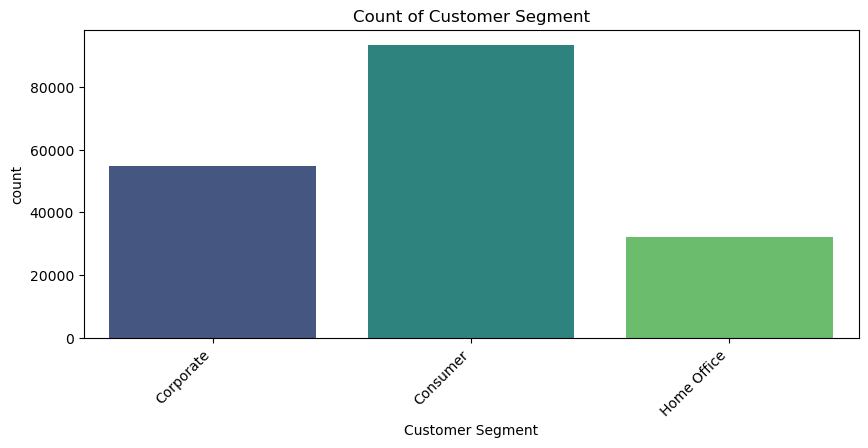

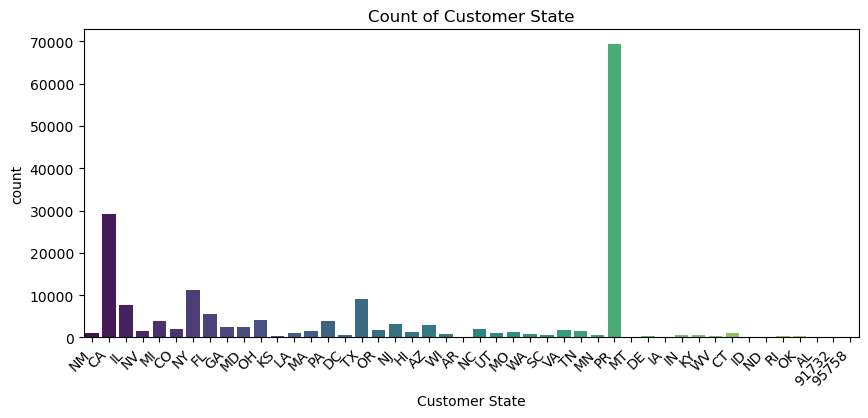


KeyboardInterrupt



In [4]:
#for categorical columns in sale data

# Select categorical columns
categorical_columns = sale_data.select_dtypes(include='object').columns

# Univariate analysis for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=sale_data[col], palette='viridis')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()


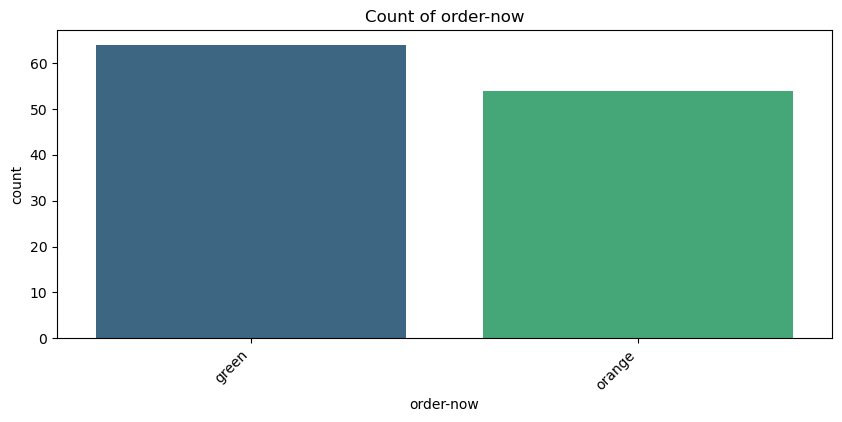

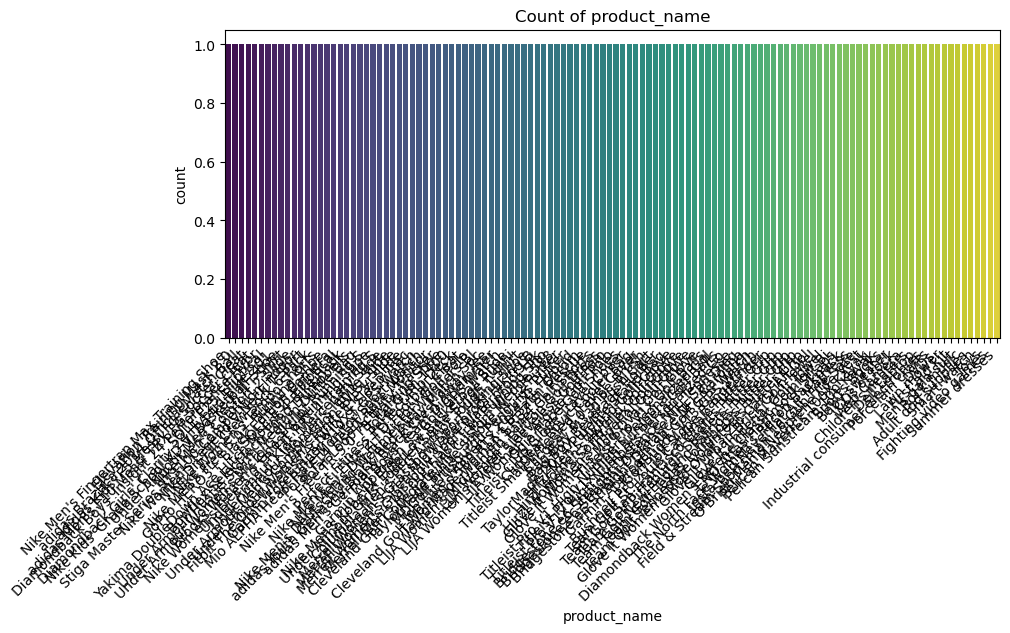

In [229]:
#for categorical columns in inventory data

# Select categorical columns
categorical_columns = inventory_data.select_dtypes(include='object').columns

# Univariate analysis for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=inventory_data[col], palette='viridis')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# 5. Find out data related issues based on the data Audit¶


In [7]:
# Identify outliers in 'Order Item Quantity'
outliers_sales_quantity = sale_data[sale_data['Order_Item_Quantity'] > sale_data['Order_Item_Quantity'].quantile(0.99)]
print("Outliers in Order Item Quantity:")
print(outliers_sales_quantity)

# Check for negative values in 'Order Profit Per Order'
negative_profit_orders = sale_data[sale_data['Order_Profit_Per_Order'] < 0]
print("Orders with Negative Profit:")
print(negative_profit_orders)


Outliers in Order Item Quantity:
Empty DataFrame
Columns: [Product_Category_Id, Category_Name, Class, Customer_City, Customer_Country, Customer_Fname, Customer_Id, Customer_Lname, Customer_Segment, Customer_State, Customer_Street, Customer_Zipcode, Delivery_Status, Department_Id, Department_Name, Market, Order_City, Order_Country, order_date_(DateOrders), Order_Id, Order_Region, Order_State, Order_Status, Product_Id, Product_Name, shipping_date_(DateOrders), Shipping_Mode, Type, Benefit_per_order, Days_for_shipment_(scheduled), Days_for_shipping_(real), Latitude, Longitude, Order_Customer_Id, Order_Item_Cardprod_Id, Order_Item_Discount, Order_Item_Discount_Rate, Order_Item_Id, Order_Item_Product_Price, Order_Item_Profit_Ratio, Order_Item_Quantity, Order_Item_Total, Order_Profit_Per_Order, Product_Price, Sales, Sales_per_customer, Late_Delivery_Risk]
Index: []

[0 rows x 47 columns]
Orders with Negative Profit:
        Product_Category_Id     Category_Name                           Clas

#                                              # DATA PREPARATION

In [6]:
#1.. Creat new flag variable Late Delivery Risk based on Days for shipping (real) & Days for shipment (scheduled)
#(Flag=Not Late if shipment is not delayed and Flag=Late if shipment is delayed)


sale_data['Late_Delivery_Risk'] = 'Not Late'  # Initialize with 'Not Late'

# Create the flag based on the condition
sale_data.loc[sale_data['Days_for_shipping_(real)'] > sale_data['Days_for_shipment_(scheduled)'], 'Late_Delivery_Risk'] = 'Late'

# Check the updated DataFrame
print(sale_data[['Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)', 'Late_Delivery_Risk']].head())


   Days_for_shipping_(real)  Days_for_shipment_(scheduled) Late_Delivery_Risk
0                         4                              2               Late
1                         4                              2               Late
2                         5                              2               Late
3                         5                              2               Late
4                         5                              2               Late


In [5]:
#2. Rename the variables as per python naming convensions

 # Replace spaces with underscores in column names
sale_data.columns = [col.replace(' ', '_') for col in sale_data.columns]
#for inventory data

inventory_data.columns = [col.replace(' ', '_') for col in inventory_data.columns]

In [78]:
sale_data.head(2)


,Product_Category_Id,Category_Name,Class,Customer_City,Customer_Country,Customer_Fname,Customer_Id,Customer_Lname,Customer_Segment,Customer_State,...,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Order_Item_Total,Order_Profit_Per_Order,Product_Price,Sales,Sales_per_customer
0,24,Women's Apparel,Moderate Value-Moderate Number,Roswell,EE. UU.,Jean,5673,Dunn,Corporate,NM,...,0.15,134920,50.0,0.11,2,85.0,9.61,50.0,100.0,85.0
1,24,Women's Apparel,Moderate Value-Moderate Number,Los Angeles,EE. UU.,Rose,9723,White,Corporate,CA,...,0.16,9722,50.0,0.11,2,84.0,9.49,50.0,100.0,84.0


In [56]:
inventory_data.head(2)

,order-now,Product_id,product_name,avg_lead_time,avg_order_qty,current_stock,max_lead_time,max_order_qty,mod,reorder_point,safety_stock
0,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,25
1,orange,24,Elevation Training Mask 2.0,10,3,175,30,5,0,175,144


In [218]:
#3.Convert the variables data types as per the data descriptions

# Date columns
date_columns = ['order_date_(DateOrders)','shipping_date_(DateOrders)']
for col in date_columns:
    sale_data[col] = pd.to_datetime(sale_data[col])
# Display the updated DataFrame with data types
print(sale_data.dtypes)


Product_Category_Id                       int64
Category_Name                            object
Class                                    object
Customer_City                            object
Customer_Country                         object
Customer_Fname                           object
Customer_Id                               int64
Customer_Lname                           object
Customer_Segment                         object
Customer_State                           object
Customer_Street                          object
Customer_Zipcode                        float64
Delivery_Status                          object
Department_Id                             int64
Department_Name                          object
Market                                   object
Order_City                               object
Order_Country                            object
order_date_(DateOrders)          datetime64[ns]
Order_Id                                  int64
Order_Region                            

In [8]:
#Merging both tables(df will be dataset now)
df = pd.merge(sale_data, inventory_data, left_on='Product_Category_Id', right_on='Product_id', how='left')

In [82]:
df

,Product_Category_Id,Category_Name,Class,Customer_City,Customer_Country,Customer_Fname,Customer_Id,Customer_Lname,Customer_Segment,Customer_State,...,Product_id,product_name,avg_lead_time,avg_order_qty,current_stock,max_lead_time,max_order_qty,mod,reorder_point,safety_stock
0,24,Women's Apparel,Moderate Value-Moderate Number,Roswell,EE. UU.,Jean,5673,Dunn,Corporate,NM,...,24.000000,Elevation Training Mask 2.0,10.0,3.000000,175.000000,30.0,5.000000,0.00000,175.000000,144.000000
1,24,Women's Apparel,Moderate Value-Moderate Number,Los Angeles,EE. UU.,Rose,9723,White,Corporate,CA,...,24.000000,Elevation Training Mask 2.0,10.0,3.000000,175.000000,30.0,5.000000,0.00000,175.000000,144.000000
2,24,Women's Apparel,Moderate Value-Moderate Number,Harvey,EE. UU.,Joshua,9511,Brady,Corporate,IL,...,24.000000,Elevation Training Mask 2.0,10.0,3.000000,175.000000,30.0,5.000000,0.00000,175.000000,144.000000
3,24,Women's Apparel,Moderate Value-Moderate Number,Elmhurst,EE. UU.,Mary,3326,Smith,Corporate,IL,...,24.000000,Elevation Training Mask 2.0,10.0,3.000000,175.000000,30.0,5.000000,0.00000,175.000000,144.000000
4,24,Women's Apparel,Moderate Value-Moderate Number,North Las Vegas,EE. UU.,Samantha,907,Kline,Corporate,NV,...,24.000000,Elevation Training Mask 2.0,10.0,3.000000,175.000000,30.0,5.000000,0.00000,175.000000,144.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,17,Cleats,High Value-Small Number,Escondido,EE. UU.,Charles,9615,Smith,Corporate,CA,...,26.571691,Elevation Training Mask 2.0,10.0,2.876417,180.303489,30.0,4.752834,0.13452,166.349194,136.826361
180515,17,Cleats,High Value-Small Number,Seattle,EE. UU.,Richard,1971,Stokes,Corporate,WA,...,26.571691,Elevation Training Mask 2.0,10.0,2.876417,180.303489,30.0,4.752834,0.13452,166.349194,136.826361
180516,9,Cardio Equipment,High Value-Small Number,Anaheim,EE. UU.,Mary,7663,Smith,Corporate,CA,...,26.571691,Elevation Training Mask 2.0,10.0,2.876417,180.303489,30.0,4.752834,0.13452,166.349194,136.826361
180517,17,Cleats,High Value-Small Number,San Diego,EE. UU.,Mary,415,Allen,Corporate,CA,...,26.571691,Elevation Training Mask 2.0,10.0,2.876417,180.303489,30.0,4.752834,0.13452,166.349194,136.826361


In [9]:
# 4. Impute missing values with mean for numerical variables, mode for categorical variables

# Impute missing values for numerical variables with mean
numeric_columns = sale_data.select_dtypes(include='number').columns
df[numeric_columns] = sale_data[numeric_columns].fillna(sale_data[numeric_columns].mean())

# Impute missing values for categorical variables with mode
categorical_columns = sale_data.select_dtypes(include='object').columns
sale_data[categorical_columns] = sale_data[categorical_columns].apply(lambda x: x.fillna(x.mode().iloc[0]))


Product_Category_Id              0
Category_Name                    0
Class                            0
Customer_City                    0
Customer_Country                 0
Customer_Fname                   0
Customer_Id                      0
Customer_Lname                   0
Customer_Segment                 0
Customer_State                   0
Customer_Street                  0
Customer_Zipcode                 3
Delivery_Status                  0
Department_Id                    0
Department_Name                  0
Market                           0
Order_City                       0
Order_Country                    0
order_date_(DateOrders)          0
Order_Id                         0
Order_Region                     0
Order_State                      0
Order_Status                     0
Product_Id                       0
Product_Name                     0
shipping_date_(DateOrders)       0
Shipping_Mode                    0
Type                             0
Benefit_per_order   

In [81]:
# 4. Impute missing values with mean for numerical variables, mode for categorical variables

# Impute missing values for numerical variables with mean
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Impute missing values for categorical variables with mode
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode().iloc[0]))

# Display the updated DataFrame
df.isna().sum()


Product_Category_Id              0
Category_Name                    0
Class                            0
Customer_City                    0
Customer_Country                 0
Customer_Fname                   0
Customer_Id                      0
Customer_Lname                   0
Customer_Segment                 0
Customer_State                   0
Customer_Street                  0
Customer_Zipcode                 0
Delivery_Status                  0
Department_Id                    0
Department_Name                  0
Market                           0
Order_City                       0
Order_Country                    0
order_date_(DateOrders)          0
Order_Id                         0
Order_Region                     0
Order_State                      0
Order_Status                     0
Product_Id                       0
Product_Name                     0
shipping_date_(DateOrders)       0
Shipping_Mode                    0
Type                             0
Benefit_per_order   

# 5. Perform any other data preparation steps as required?

In [10]:
# Function to treat outliers by capping/extreme value replacement
def treat_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    # Cap values beyond the upper limit
    column = np.where(column > upper_limit, upper_limit, column)
    # Cap values beyond the lower limit (optional, depending on your use case)
    # column = np.where(column < lower_limit, lower_limit, column)
 
    return column

# Identify and treat outliers for all numerical columns
numerical_columns = sale_data.select_dtypes(include=['number']).columns

for column in numerical_columns:
    sale_data[column] = treat_outliers(sale_data[column])

#                                                      C. ANALYSIS

# Calculate high level metrics like, total sale value, total sale units, inventory value, inventory quantity, profit value, number of distinct products, number of distinct categories, number of distinct products.

In [11]:
# Total sale value
total_sale_value = sale_data['Sales'].sum()

# Total sale units
total_sale_units = sale_data['Order_Item_Quantity'].sum()

# Inventory value
inventory_value = (sale_data['Product_Price'] * inventory_data['current_stock']).sum()

# Inventory quantity
inventory_quantity  = inventory_data['current_stock'].sum()

# Profit value
profit_value = sale_data['Order_Profit_Per_Order'].sum()

# Number of distinct products
num_distinct_products = sale_data['Product_Id'].nunique()

# Number of distinct categories
num_distinct_categories = sale_data['Product_Category_Id'].nunique()

# Number of distinct customers
num_distinct_customers = sale_data['Customer_Id'].nunique()

# Average Sale Price per Unit
average_sale_price_per_unit = total_sale_value / total_sale_units

# Average Profit per Order
average_profit_per_order = profit_value / len(sale_data['Order_Id'].unique())
# Average Profit per Product
average_profit_per_product = profit_value / num_distinct_products


# Display the calculated metrics
print("Total Sale Value:", round(total_sale_value))
print("Total Sale Units:", total_sale_units)
print("Inventory Value:", round(inventory_value))
print("Inventory Quantity:", round(inventory_quantity))
print("Profit Value:", round(profit_value))
print("Number of Distinct Products:", num_distinct_products)
print("Number of Distinct Categories:", num_distinct_categories)
print("Number of Distinct Customers:", num_distinct_customers)
print("Average Sale Price per Unit:", round(average_sale_price_per_unit))
print("Average Profit per Order:", round(average_profit_per_order))
print("Average Profit per Product:",round( average_profit_per_product))

Total Sale Value: 36347249
Total Sale Units: 384079.0
Inventory Value: 1839622
Inventory Quantity: 18965
Profit Value: 3739430
Number of Distinct Products: 118
Number of Distinct Categories: 51
Number of Distinct Customers: 19455
Average Sale Price per Unit: 95
Average Profit per Order: 57
Average Profit per Product: 31690


# Status of orders (number of orders by current status)

In [233]:

# Calculate the number of orders by current status
order_status_counts = sale_data['Order_Status'].value_counts()


print("Number of Orders by Current Status:")
print(order_status_counts)


Number of Orders by Current Status:
Complete           59491
Pending Payment    39832
Processing         21902
Pending            20227
Closed             19616
On Hold             9804
Suspected Fraud     4062
Canceled            3692
Payment Review      1893
Name: Order_Status, dtype: int64


# 3.Status of Delivery of orders (number of orders by each type of delivery status)

In [234]:
# Calculate the number of orders by each type of delivery status
delivery_status_counts = sale_data['Delivery_Status'].value_counts()

# Display the result
print("Number of Orders by Each Type of Delivery Status:")
print(delivery_status_counts)


Number of Orders by Each Type of Delivery Status:
Late        98977
Advance     41592
On time     32196
Canceled     7754
Name: Delivery_Status, dtype: int64


In [21]:
sale_data.columns

Index(['Product_Category_Id', 'Category_Name', 'Class', 'Customer_City',
       'Customer_Country', 'Customer_Fname', 'Customer_Id', 'Customer_Lname',
       'Customer_Segment', 'Customer_State', 'Customer_Street',
       'Customer_Zipcode', 'Delivery_Status', 'Department_Id',
       'Department_Name', 'Market', 'Order_City', 'Order_Country',
       'order_date_(DateOrders)', 'Order_Id', 'Order_Region', 'Order_State',
       'Order_Status', 'Product_Id', 'Product_Name',
       'shipping_date_(DateOrders)', 'Shipping_Mode', 'Type',
       'Benefit_per_order', 'Days_for_shipment_(scheduled)',
       'Days_for_shipping_(real)', 'Latitude', 'Longitude',
       'Order_Customer_Id', 'Order_Item_Cardprod_Id', 'Order_Item_Discount',
       'Order_Item_Discount_Rate', 'Order_Item_Id', 'Order_Item_Product_Price',
       'Order_Item_Profit_Ratio', 'Order_Item_Quantity', 'Order_Item_Total',
       'Order_Profit_Per_Order', 'Product_Price', 'Sales',
       'Sales_per_customer', 'Late_Delivery_Risk'

# 4. Late Delivery Risk by time (by each week, month, year, quarter)

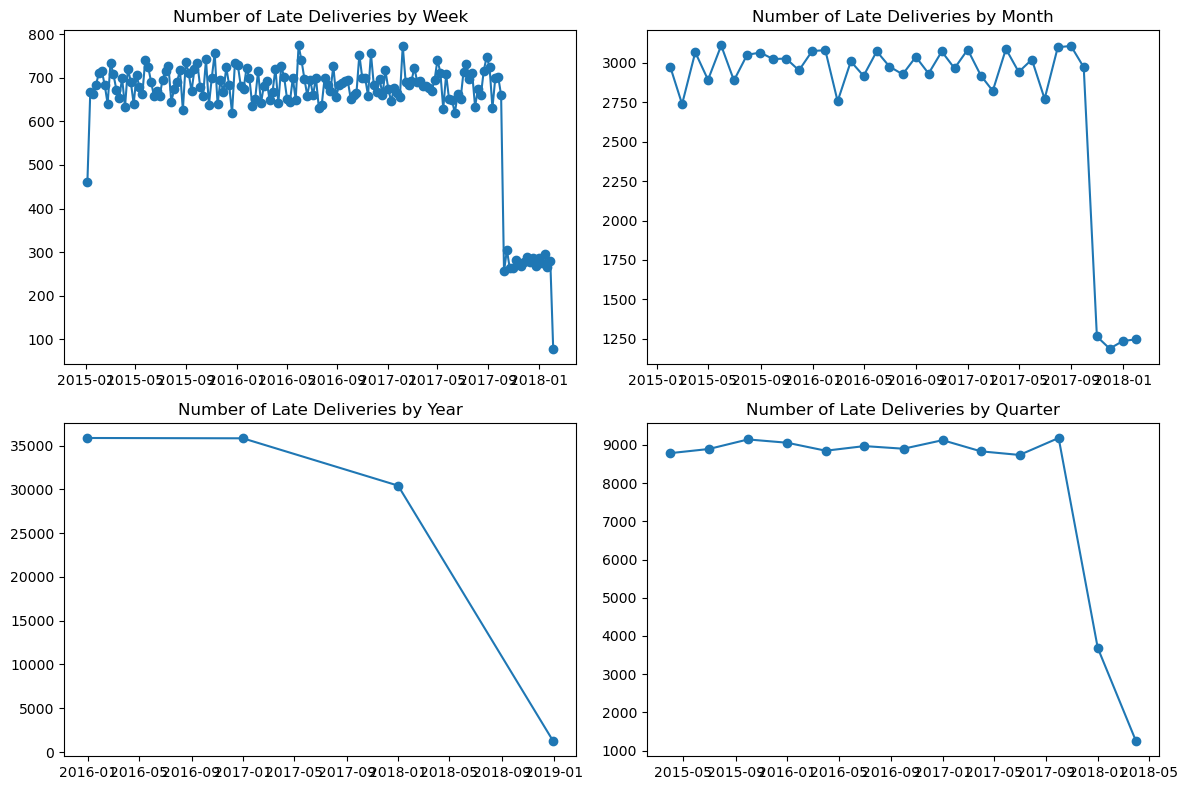

In [36]:
# Set 'Order_Date' as the index for time-based analysis
sale_data.set_index('order_date_(DateOrders)', inplace=True)
# Filter DataFrame for late deliveries
late_deliveries = sale_data[sale_data['Late_Delivery_Risk'] == 'Late']

# Count late deliveries for each time period
weekly_counts = late_deliveries.resample('W-mon').size()
monthly_counts = late_deliveries.resample('M').size()
yearly_counts = late_deliveries.resample('Y').size()
quarterly_counts = late_deliveries.resample('Q').size()

# Plot the results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0, 0].plot(weekly_counts, marker='o', linestyle='-')
axes[0, 0].set_title('Number of Late Deliveries by Week')

axes[0, 1].plot(monthly_counts, marker='o', linestyle='-')
axes[0, 1].set_title('Number of Late Deliveries by Month')

axes[1, 0].plot(yearly_counts, marker='o', linestyle='-')
axes[1, 0].set_title('Number of Late Deliveries by Year')

axes[1, 1].plot(quarterly_counts, marker='o', linestyle='-')
axes[1, 1].set_title('Number of Late Deliveries by Quarter')

plt.tight_layout()
plt.show()




# 5. Order Item qty by time (by each week, month, year, quarter)

In [130]:
# Resample data to the desired frequency (weekly, monthly, yearly, quarterly)
weekly_order_item_qty = df['Order_Item_Quantity'].resample('W-Mon').sum()
monthly_order_item_qty = df['Order_Item_Quantity'].resample('M').sum()
yearly_order_item_qty = df['Order_Item_Quantity'].resample('Y').sum()
quarterly_order_item_qty = df['Order_Item_Quantity'].resample('Q').sum()

# Display the results
print("Total Order Item Quantity by Week:")
print(weekly_order_item_qty)

print("\nTotal Order Item Quantity by Month:")
print(monthly_order_item_qty)

print("\nTotal Order Item Quantity by Year:")
print(yearly_order_item_qty)

print("\nTotal Order Item Quantity by Quarter:")
print(quarterly_order_item_qty)

Total Order Item Quantity by Week:
Order_Date
2015-01-05    1884
2015-01-12    2653
2015-01-19    2633
2015-01-26    2792
2015-02-02    2602
              ... 
2018-01-08     480
2018-01-15     479
2018-01-22     480
2018-01-29     479
2018-02-05     137
Freq: W-MON, Name: Order_Item_Quantity, Length: 162, dtype: int64

Total Order Item Quantity by Month:
Order_Date
2015-01-31    11854
2015-02-28    10438
2015-03-31    12062
2015-04-30    11287
2015-05-31    11902
2015-06-30    11203
2015-07-31    11800
2015-08-31    11612
2015-09-30    11366
2015-10-31    11703
2015-11-30    11463
2015-12-31    11790
2016-01-31    11597
2016-02-29    10765
2016-03-31    11349
2016-04-30    11208
2016-05-31    11603
2016-06-30    11008
2016-07-31    11652
2016-08-31    11683
2016-09-30    11284
2016-10-31    11936
2016-11-30    11493
2016-12-31    11774
2017-01-31    11605
2017-02-28    11070
2017-03-31    11676
2017-04-30    11189
2017-05-31    11033
2017-06-30    10194
2017-07-31    11091
2017-08-31 

# 6. Sales units/value  by time (by each week, month, year, quarter)

In [40]:

# Resample data to the desired frequency (weekly, monthly, yearly, quarterly)
weekly_sales_units = sale_data['Order_Item_Quantity'].resample('W-Mon').sum()
monthly_sales_units = sale_data['Order_Item_Quantity'].resample('M').sum()
yearly_sales_units = sale_data['Order_Item_Quantity'].resample('Y').sum()
quarterly_sales_units = sale_data['Order_Item_Quantity'].resample('Q').sum()

weekly_sales_value = sale_data['Sales'].resample('W-Mon').sum()
monthly_sales_value = sale_data['Sales'].resample('M').sum()
yearly_sales_value = sale_data['Sales'].resample('Y').sum()
quarterly_sales_value = sale_data['Sales'].resample('Q').sum()

# Display the results
print("Total Sales Units by Week:")
print(weekly_sales_units)

print("\nTotal Sales Units by Month:")
print(round(monthly_sales_units))

print("\nTotal Sales Units by Year:")
print(round(yearly_sales_units))

print("\nTotal Sales Units by Quarter:")
print(round(quarterly_sales_units))

print("\nTotal Sales Value by Week:")
print(round(weekly_sales_value))

print("\nTotal Sales Value by Month:")
print(round(monthly_sales_value))

print("\nTotal Sales Value by Year:")
print(round(yearly_sales_value))

print("\nTotal Sales Value by Quarter:")
print(round(quarterly_sales_value))


Total Sales Units by Week:
order_date_(DateOrders)
2015-01-05    1884
2015-01-12    2653
2015-01-19    2633
2015-01-26    2792
2015-02-02    2602
              ... 
2018-01-08     480
2018-01-15     479
2018-01-22     480
2018-01-29     479
2018-02-05     137
Freq: W-MON, Name: Order_Item_Quantity, Length: 162, dtype: int64

Total Sales Units by Month:
order_date_(DateOrders)
2015-01-31    11854
2015-02-28    10438
2015-03-31    12062
2015-04-30    11287
2015-05-31    11902
2015-06-30    11203
2015-07-31    11800
2015-08-31    11612
2015-09-30    11366
2015-10-31    11703
2015-11-30    11463
2015-12-31    11790
2016-01-31    11597
2016-02-29    10765
2016-03-31    11349
2016-04-30    11208
2016-05-31    11603
2016-06-30    11008
2016-07-31    11652
2016-08-31    11683
2016-09-30    11284
2016-10-31    11936
2016-11-30    11493
2016-12-31    11774
2017-01-31    11605
2017-02-28    11070
2017-03-31    11676
2017-04-30    11189
2017-05-31    11033
2017-06-30    10194
2017-07-31    11091
2

# 7. Profit orders/value  by time (by each week, month, year, quarter)

In [46]:
# Resample data to the desired frequency (weekly, monthly, yearly, quarterly)
weekly_profit_orders = sale_data['Order_Profit_Per_Order'].resample('W-Mon').sum()
monthly_profit_orders = sale_data['Order_Profit_Per_Order'].resample('M').sum()
yearly_profit_orders = sale_data['Order_Profit_Per_Order'].resample('Y').sum()
quarterly_profit_orders = sale_data['Order_Profit_Per_Order'].resample('Q').sum()

weekly_profit_value = sale_data['Order_Item_Total'].resample('W-Mon').sum()
monthly_profit_value = sale_data['Order_Item_Total'].resample('M').sum()
yearly_profit_value = sale_data['Order_Item_Total'].resample('Y').sum()
quarterly_profit_value = sale_data['Order_Item_Total'].resample('Q').sum()

# Display the results
print("Total Sales Units by Week:")
print(round(weekly_profit_orders))

print("\nTotal Sales Units by Month:")
print(round(monthly_profit_orders))

print("\nTotal Sales Units by Year:")
print(round(yearly_profit_orders))

print("\nTotal Sales Units by Quarter:")
print(round(quarterly_profit_orders))

print("\nTotal Sales Value by Week:")
print(round(weekly_profit_value))

print("\nTotal Sales Value by Month:")
print(round(monthly_profit_value))

print("\nTotal Sales Value by Year:")
print(round(yearly_profit_value))

print("\nTotal Sales Value by Quarter:")
print(round(quarterly_profit_value))


Total Sales Units by Week:
order_date_(DateOrders)
2015-01-05    19812.0
2015-01-12    25211.0
2015-01-19    24359.0
2015-01-26    23220.0
2015-02-02    27699.0
               ...   
2018-01-08    10208.0
2018-01-15     4892.0
2018-01-22     1108.0
2018-01-29     9828.0
2018-02-05     2472.0
Freq: W-MON, Name: Order_Profit_Per_Order, Length: 162, dtype: float64

Total Sales Units by Month:
order_date_(DateOrders)
2015-01-31    111661.0
2015-02-28     99141.0
2015-03-31    113778.0
2015-04-30    108084.0
2015-05-31    112148.0
2015-06-30    110147.0
2015-07-31    115624.0
2015-08-31    117980.0
2015-09-30    113468.0
2015-10-31    101758.0
2015-11-30    104427.0
2015-12-31    110642.0
2016-01-31    106781.0
2016-02-29     86809.0
2016-03-31    101260.0
2016-04-30    114977.0
2016-05-31    110716.0
2016-06-30    104196.0
2016-07-31    119942.0
2016-08-31    110730.0
2016-09-30    123385.0
2016-10-31    116782.0
2016-11-30    109539.0
2016-12-31    105003.0
2017-01-31    114844.0
2017-02-

# 8. Order profit per order  by time (by each week, month, year, quarter)

In [50]:
# Resample data to the desired frequency (weekly, monthly, yearly, quarterly)
weekly_order_profit_per_order = sale_data['Order_Profit_Per_Order'].resample('W-Mon').mean()
monthly_order_profit_per_order = sale_data['Order_Profit_Per_Order'].resample('M').mean()
yearly_order_profit_per_order = sale_data['Order_Profit_Per_Order'].resample('Y').mean()
quarterly_order_profit_per_order = sale_data['Order_Profit_Per_Order'].resample('Q').mean()

# Display the results
print("Total Sales Units by Week:")
print(round(weekly_order_profit_per_order))

print("\nTotal Sales Units by Month:")
print(round(monthly_order_profit_per_order))

print("\nTotal Sales Units by Year:")
print(round(yearly_order_profit_per_order))

print("\nTotal Sales Units by Quarter:")
print(round(quarterly_order_profit_per_order))




Total Sales Units by Week:
order_date_(DateOrders)
2015-01-05    23.0
2015-01-12    21.0
2015-01-19    21.0
2015-01-26    19.0
2015-02-02    23.0
              ... 
2018-01-08    21.0
2018-01-15    10.0
2018-01-22     2.0
2018-01-29    21.0
2018-02-05    18.0
Freq: W-MON, Name: Order_Profit_Per_Order, Length: 162, dtype: float64

Total Sales Units by Month:
order_date_(DateOrders)
2015-01-31    21.0
2015-02-28    21.0
2015-03-31    21.0
2015-04-30    21.0
2015-05-31    21.0
2015-06-30    21.0
2015-07-31    22.0
2015-08-31    22.0
2015-09-30    22.0
2015-10-31    19.0
2015-11-30    20.0
2015-12-31    21.0
2016-01-31    20.0
2016-02-29    18.0
2016-03-31    19.0
2016-04-30    23.0
2016-05-31    21.0
2016-06-30    21.0
2016-07-31    23.0
2016-08-31    21.0
2016-09-30    24.0
2016-10-31    22.0
2016-11-30    21.0
2016-12-31    20.0
2017-01-31    22.0
2017-02-28    23.0
2017-03-31    22.0
2017-04-30    22.0
2017-05-31    22.0
2017-06-30    22.0
2017-07-31    21.0
2017-08-31    25.0
2017-09-

In [51]:
# Resample data to the desired frequency (weekly, monthly, yearly, quarterly) and count orders by country/state
weekly_order_count_by_country = sale_data.groupby(['Order_Country']).resample('W-Mon').size().unstack().fillna(0)
monthly_order_count_by_country = sale_data.groupby(['Order_Country']).resample('M').size().unstack().fillna(0)
yearly_order_count_by_country = sale_data.groupby(['Order_Country']).resample('Y').size().unstack().fillna(0)
quarterly_order_count_by_country = sale_data.groupby(['Order_Country']).resample('Q').size().unstack().fillna(0)

weekly_order_count_by_state = sale_data.groupby(['Order_State']).resample('W-Mon').size().unstack().fillna(0)
monthly_order_count_by_state = sale_data.groupby(['Order_State']).resample('M').size().unstack().fillna(0)
yearly_order_count_by_state = sale_data.groupby(['Order_State']).resample('Y').size().unstack().fillna(0)
quarterly_order_count_by_state = sale_data.groupby(['Order_State']).resample('Q').size().unstack().fillna(0)


# Display the results
print("Order Count by Country - Weekly:")
print(weekly_order_count_by_country)

print("\nOrder Count by Country - Monthly:")
print(monthly_order_count_by_country)

print("\nOrder Count by Country - Yearly:")
print(yearly_order_count_by_country)

print("\nOrder Count by Country - Quarterly:")
print(quarterly_order_count_by_country)

print("\nOrder Count by State - Weekly:")
print(weekly_order_count_by_state)

print("\nOrder Count by State - Monthly:")
print(monthly_order_count_by_state)

print("\nOrder Count by State - Yearly:")
print(yearly_order_count_by_state)

print("\nOrder Count by State - Quarterly:")
print(quarterly_order_count_by_state)

Order Count by Country - Weekly:
order_date_(DateOrders)  2015-01-05  2015-01-12  2015-01-19  2015-01-26  \
Order_Country                                                             
Afganistán                      0.0         0.0         0.0         0.0   
Albania                         0.0         0.0         0.0         0.0   
Alemania                        0.0         0.0         0.0         0.0   
Angola                          0.0         0.0         0.0         0.0   
Arabia Saudí                    0.0         0.0         0.0         0.0   
...                             ...         ...         ...         ...   
Vietnam                         0.0         0.0         0.0         0.0   
Yemen                           0.0         0.0         0.0         0.0   
Yibuti                          0.0         0.0         0.0         0.0   
Zambia                          0.0         0.0         0.0         0.0   
Zimbabue                        0.0         0.0         0.0        

# 10. Inventory Units by each class or cluster

In [166]:
# Group by 'Class' and sum the inventory units
inventory_units_by_class = df.groupby('Class')['current_stock'].sum()

# Display the results
print("Inventory Units by Class or Cluster:")
print(round(inventory_units_by_class))


Inventory Units by Class or Cluster:
Class
High Value-Small Number           12213398.0
Moderate Value-Moderate Number    10486860.0
Small Value-Large Number           9847947.0
Name: current_stock, dtype: float64


# 11. Inventory Value by each class or cluster

In [167]:
# Calculate the inventory value for each class
df['Inventory_Value'] = df['avg_order_qty'] * df['Product_Price']

# Group by 'Class' and sum the inventory values
inventory_value_by_class = df.groupby('Class')['Inventory_Value'].sum()

# Display the results
print("Inventory Value by Class or Cluster:")
print(round(inventory_value_by_class))

Inventory Value by Class or Cluster:
Class
High Value-Small Number           39509062.0
Moderate Value-Moderate Number    20389598.0
Small Value-Large Number          13434429.0
Name: Inventory_Value, dtype: float64


# 12. inventory by class

In [175]:
invt= df.groupby('Class')['product_name'].count()
invt

Class
High Value-Small Number           67738
Moderate Value-Moderate Number    58781
Small Value-Large Number          54000
Name: product_name, dtype: int64

# 13. Detail Stock Action (products to be ordered, not required to ordered)

In [102]:
# Assuming your DataFrame is named 'inventory_data' and the columns representing reorder point and current stock are 'Reorder_Point' and 'Current_Stock'

# Add a new column 'Order_Action' to indicate whether the product needs to be ordered
df['Order_Action'] = np.where(df['current_stock'] < df['reorder_point'], 'Order Required', 'Not Required')

# Display the results
print("Stock Action for Each Product:")
print(df[['Product_id', 'Product_Name', 'Order_Action']])


Stock Action for Each Product:
        Product_id                          Product_Name  Order_Action
0        24.000000  Nike Men's Dri-FIT Victory Golf Polo  Not Required
1        24.000000  Nike Men's Dri-FIT Victory Golf Polo  Not Required
2        24.000000  Nike Men's Dri-FIT Victory Golf Polo  Not Required
3        24.000000  Nike Men's Dri-FIT Victory Golf Polo  Not Required
4        24.000000  Nike Men's Dri-FIT Victory Golf Polo  Not Required
...            ...                                   ...           ...
180514   26.571691      Perfect Fitness Perfect Rip Deck  Not Required
180515   26.571691      Perfect Fitness Perfect Rip Deck  Not Required
180516   26.571691     Nike Men's Free 5.0+ Running Shoe  Not Required
180517   26.571691      Perfect Fitness Perfect Rip Deck  Not Required
180518   26.571691      Perfect Fitness Perfect Rip Deck  Not Required

[180519 rows x 3 columns]


# 14. Product Order qty trend  (by time (by each week, month, year, quarter))

In [109]:
df['Order_Date'] = pd.to_datetime(df['order_date_(DateOrders)'])

# Set 'Order_Date' as the index for time-based analysis
df.set_index('Order_Date', inplace=True)
# Resample data to the desired frequency (weekly, monthly, yearly, quarterly) and sum order quantities for each product
product_order_qty_trend_weekly = df.groupby(['Product_id']).resample('W-Mon')['Order_Item_Quantity'].sum().unstack().fillna(0)
product_order_qty_trend_monthly = df.groupby(['Product_id']).resample('M')['Order_Item_Quantity'].sum().unstack().fillna(0)
product_order_qty_trend_yearly = df.groupby(['Product_id']).resample('Y')['Order_Item_Quantity'].sum().unstack().fillna(0)
product_order_qty_trend_quarterly = df.groupby(['Product_id']).resample('Q')['Order_Item_Quantity'].sum().unstack().fillna(0)

# Display the results
print("Product Order Quantity Trend - Weekly:")
print(product_order_qty_trend_weekly)

print("\nProduct Order Quantity Trend - Monthly:")
print(product_order_qty_trend_monthly)

print("\nProduct Order Quantity Trend - Yearly:")
print(product_order_qty_trend_yearly)

print("\nProduct Order Quantity Trend - Quarterly:")
print(product_order_qty_trend_quarterly)

Product Order Quantity Trend - Weekly:
Order_Date  2015-01-05  2015-01-12  2015-01-19  2015-01-26  2015-02-02  \
Product_id                                                               
24.000000        262.0       425.0       452.0       368.0       512.0   
26.571691       1546.0      2156.0      2111.0      2318.0      1991.0   
35.000000         26.0        14.0        11.0        24.0        29.0   
37.000000         47.0        49.0        47.0        60.0        65.0   
44.000000          3.0         9.0        12.0        22.0         5.0   
60.000000          0.0         0.0         0.0         0.0         0.0   
61.000000          0.0         0.0         0.0         0.0         0.0   

Order_Date  2015-02-09  2015-02-16  2015-02-23  2015-03-02  2015-03-09  ...  \
Product_id                                                              ...   
24.000000        382.0       428.0       511.0       479.0       421.0  ...   
26.571691       2112.0      2047.0      2121.0      2176.

# 15. Top 10 Most ordered products/Top 10 Most Categories/Top 10 cities interms of revenue and sale units (quantity)

In [110]:
# Top 10 most ordered products
top_10_products = df.groupby('Product_Name')['Order_Item_Quantity'].sum().nlargest(10)
print("Top 10 Most Ordered Products:")
print(top_10_products)

# Top 10 most ordered categories
top_10_categories = df.groupby('Category_Name')['Order_Item_Quantity'].sum().nlargest(10)
print("\nTop 10 Most Ordered Categories:")
print(top_10_categories)

# Top 10 cities in terms of revenue
top_10_cities_revenue = df.groupby('Order_City')['Sales'].sum().nlargest(10)
print("\nTop 10 Cities in Terms of Revenue:")
print(top_10_cities_revenue)

# Top 10 cities in terms of sale units (quantity)
top_10_cities_sale_units = df.groupby('Order_City')['Order_Item_Quantity'].sum().nlargest(10)
print("\nTop 10 Cities in Terms of Sale Units (Quantity):")
print(top_10_cities_sale_units)


Top 10 Most Ordered Products:
Product_Name
Perfect Fitness Perfect Rip Deck                 73698
Nike Men's Dri-FIT Victory Golf Polo             62956
O'Brien Men's Neoprene Life Vest                 57803
Nike Men's Free 5.0+ Running Shoe                36680
Under Armour Girls' Toddler Spine Surge Runni    31735
Nike Men's CJ Elite 2 TD Football Cleat          22246
Field & Stream Sportsman 16 Gun Fire Safe        17325
Pelican Sunstream 100 Kayak                      15500
Diamondback Women's Serene Classic Comfort Bi    13729
ENO Atlas Hammock Straps                           998
Name: Order_Item_Quantity, dtype: int64

Top 10 Most Ordered Categories:
Category_Name
Cleats                  73734
Women's Apparel         62956
Indoor/Outdoor Games    57803
Cardio Equipment        37587
Shop By Sport           32726
Men's Footwear          22246
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Electronics              9436
Name: Order_Item_Qua

# 16. Top payment methods by each product category.

In [1]:
# Assuming your DataFrame is named 'df' and the columns representing payment method and product category are 'Type' and 'Category_Name'

# Get the top payment methods by each product category
top_payment_methods_by_category = df.groupby('Category_Name')['Type'].value_counts().groupby(level=0, group_keys=False).nlargest(1)
print("Top Payment Methods by Each Product Category:")
top_payment_methods_by_category


NameError: name 'df' is not defined

# 17. Which shipping mode is more efficient interms of not delaying?

In [114]:
# Create a new column 'On_Time_Delivery' based on the comparison of actual and scheduled shipment days
df['On_Time_Delivery'] = (df['Days_for_shipping_(real)'] <= df['Days_for_shipment_(scheduled)']).astype(int)

# Calculate the percentage of on-time deliveries for each shipping mode
on_time_percentage_by_mode = df.groupby('Shipping_Mode')['On_Time_Delivery'].mean() * 100
print("Percentage of On-Time Deliveries by Shipping Mode:")
print(on_time_percentage_by_mode)


Percentage of On-Time Deliveries by Shipping Mode:
Shipping_Mode
First Class        0.000000
Same Day          52.172127
Second Class      20.269196
Standard Class    60.231829
Name: On_Time_Delivery, dtype: float64


# 18. Number of orders, sales, qty  by order status

In [238]:
order_status_summary = sale_data.groupby('Order_Status').agg({
    'Order_Id': 'nunique',               # Number of orders
    'Sales': 'sum',                      # Total sales
    'Order_Item_Quantity': 'sum'         # Total quantity
}).reset_index()

# Display the result
print(order_status_summary)

      Order_Status  Order_Id         Sales  Order_Item_Quantity
0         Canceled      1367  7.386996e+05               7875.0
1           Closed      7249  3.971809e+06              41458.0
2         Complete     21716  1.193631e+07             126624.0
3          On Hold      3624  1.958651e+06              20845.0
4   Payment Review       704  3.790032e+05               4109.0
5          Pending      7321  4.084239e+06              43196.0
6  Pending Payment     14382  8.022469e+06              84736.0
7       Processing      7901  4.440367e+06              46623.0
8  Suspected Fraud      1488  8.157039e+05               8613.0


# 19. Which categories are most profitable categories (top5)?

In [117]:
# Calculate total profit for each category
total_profit_by_category = df.groupby('Category_Name')['Order_Profit_Per_Order'].sum()

# Find the top 5 most profitable categories
top_5_profitable_categories = total_profit_by_category.nlargest(5)
print("Top 5 Most Profitable Categories:")
print(round(top_5_profitable_categories))


Top 5 Most Profitable Categories:
Category_Name
Fishing             756221.0
Cleats              494637.0
Camping & Hiking    427456.0
Cardio Equipment    383011.0
Women's Apparel     350421.0
Name: Order_Profit_Per_Order, dtype: float64


# 20. Which categoires have been given highest average discount (top5)?

In [119]:
# Calculate the average discount for each category
average_discount_by_category = df.groupby('Category_Name')['Order_Item_Discount'].mean()

# Find the top 5 categories with the highest average discount
top_5_high_discount_categories = average_discount_by_category.nlargest(5)
print("Top 5 Categories with the Highest Average Discount:")
print(round(top_5_high_discount_categories))


Top 5 Categories with the Highest Average Discount:
Category_Name
Computers            153.0
Strength Training     55.0
Garden                54.0
Crafts                47.0
Cameras               46.0
Name: Order_Item_Discount, dtype: float64


# 21. Geographical Sales Analysis by country

In [187]:
# Group data by customer country and calculate total sales
geographical_sales = df.groupby('Customer_Country')['Sales'].sum().sort_values(ascending=False)

round(geographical_sales)


Customer_Country
EE. UU.        22634493.0
Puerto Rico    14150242.0
Name: Sales, dtype: float64

# 22.impact of discount on sales and profits

In [15]:
# Calculate total sales with and without discounts
total_sales_with_discount = df[df['Order_Item_Discount'] > 0]['Sales'].sum()
total_sales_without_discount = df[df['Order_Item_Discount'] == 0]['Sales'].sum()

# Calculate the percentage change in sales
percentage_change_sales = ((total_sales_with_discount - total_sales_without_discount) / total_sales_without_discount) * 100

print(f"Total Sales with Discounts: {total_sales_with_discount:.2f}")
print(f"Total Sales without Discounts: {total_sales_without_discount:.2f}")
print(f"Percentage Change in Sales: {percentage_change_sales:.2f}%")
# On Profits

# Calculate total profit with and without discounts
total_profit_with_discount = df[df['Order_Item_Discount'] > 0]['Order_Profit_Per_Order'].sum()
total_profit_without_discount = df[df['Order_Item_Discount'] == 0]['Order_Profit_Per_Order'].sum()

# Calculate the percentage change in profit
percentage_change_profit = ((total_profit_with_discount - total_profit_without_discount) / total_profit_without_discount) * 100

print(f"Total Profit with Discounts: {total_profit_with_discount:.2f}")
print(f"Total Profit without Discounts: {total_profit_without_discount:.2f}")
print(f"Percentage Change in Profit: {percentage_change_profit:.2f}%")



Total Sales with Discounts: 34742365.83
Total Sales without Discounts: 2042369.18
Percentage Change in Sales: 1601.08%
Total Profit with Discounts: 3699490.57
Total Profit without Discounts: 267412.40
Percentage Change in Profit: 1283.44%


# 23 Identify products with low stock levels and potential stockouts.

In [129]:
# Calculate available stock (current stock - safety stock)
inventory_data['available_stock'] = inventory_data['current_stock'] - inventory_data['safety_stock']

# Identify products with low stock levels and potential stockouts
low_stock_products = inventory_data[inventory_data['available_stock'] < inventory_data['reorder_point']]

# Display products with low stock levels
print("Products with Low Stock Levels and Potential Stockouts:")
print(low_stock_products[['Product_id', 'product_name', 'current_stock', 'reorder_point', 'safety_stock', 'available_stock']])


Products with Low Stock Levels and Potential Stockouts:
     Product_id                                   product_name  current_stock  \
1            24                    Elevation Training Mask 2.0            175   
4            44     adidas Men's F10 Messi TRX FG Soccer Cleat            175   
5            58  Diamondback Boys' Insight 24 Performance Hybr             35   
6            60                            SOLE E25 Elliptical             35   
8            78  Nike Kids' Grade School KD VI Basketball Shoe            175   
10          116                     Nike Men's Comfort 2 Slide            175   
12          134             Nike Women's Legend V-Neck T-Shirt            175   
14          172                      Nike Women's Tempo Shorts            175   
17          208                            SOLE E35 Elliptical             35   
18          216  Yakima DoubleDown Ace Hitch Mount 4-Bike Rack             35   
19          226              Bowflex SelectTech 1090 

# 24.Best selling products

In [184]:
# Calculate total sales by product
total_sales_by_product = df.groupby(['Product_id', 'Product_Name'])['Sales'].sum().reset_index()

# Sort products by total sales in descending order to identify best-selling products
best_selling_products = total_sales_by_product.sort_values(by='Sales', ascending=False).head(10)
round(best_selling_products)

,Product_id,Product_Name,Sales
15,27.0,Field & Stream Sportsman 16 Gun Fire Safe,6929654.0
61,27.0,Perfect Fitness Perfect Rip Deck,4421143.0
13,27.0,Diamondback Women's Serene Classic Comfort Bi,4118426.0
51,27.0,Nike Men's Free 5.0+ Running Shoe,3667633.0
0,24.0,Nike Men's Dri-FIT Victory Golf Polo,3147800.0
60,27.0,Pelican Sunstream 100 Kayak,3099845.0
47,27.0,Nike Men's CJ Elite 2 TD Football Cleat,2891758.0
57,27.0,O'Brien Men's Neoprene Life Vest,2888994.0
84,27.0,Under Armour Girls' Toddler Spine Surge Runni,1269083.0
10,27.0,Dell Laptop,663000.0


# 25.sales according to customer segment

In [134]:
# Group data by customer segment and calculate total sales
sales_by_segment = sale_data.groupby('Customer_Segment')['Sales'].sum().reset_index()
print(round(sales_by_segment))

  Customer_Segment       Sales
0         Consumer  19095790.0
1        Corporate  11168407.0
2      Home Office   6520538.0


#                                              D. VISUALISATION

# DELIVERY STATUS

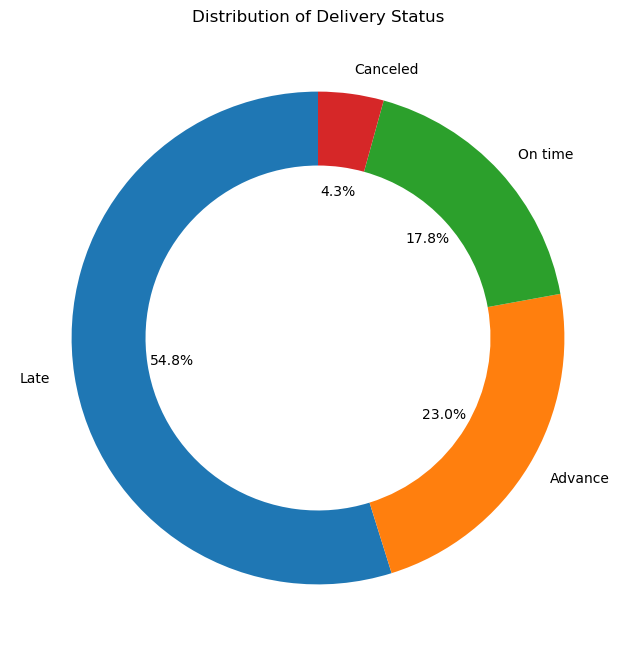

<Figure size 640x480 with 0 Axes>

In [13]:
# Count the occurrences of each delivery status
delivery_status_counts = sale_data['Delivery_Status'].value_counts()

# Create a doughnut chart
plt.figure(figsize=(8, 8))
plt.pie(delivery_status_counts, labels=delivery_status_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Distribution of Delivery Status')
plt.gca().add_artist(plt.Circle((0,0),0.2,fc='white'))  # Create a white circle in the middle for a doughnut effect

# Show the plot
plt.show()
plt.savefig('C:/Users/lenovo/Desktop/py/image/delvery_status.png')

# ORDER STATUS

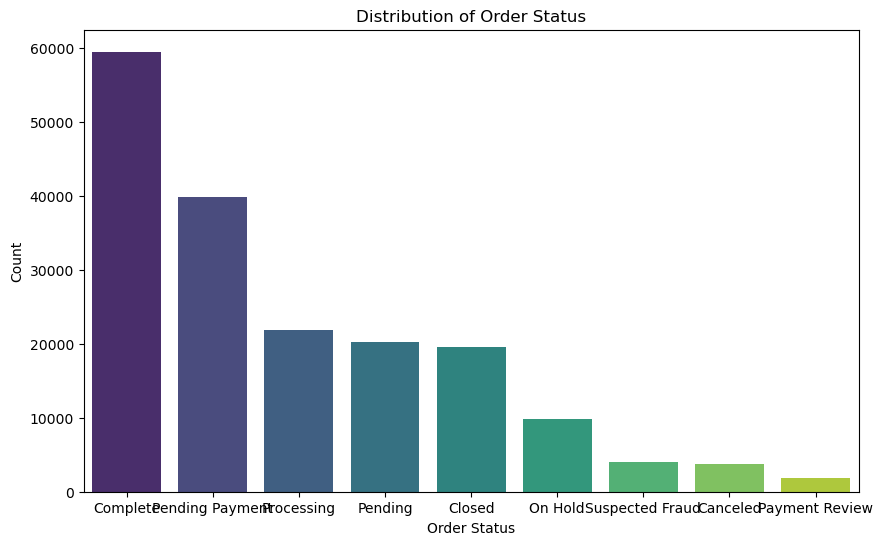

In [138]:
# Count the occurrences of each order status
order_status_counts = sale_data['Order_Status'].value_counts()

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=order_status_counts.index,y=order_status_counts.values, palette='viridis')
plt.title('Distribution of Order Status')
plt.xlabel('Order Status')
plt.ylabel('Count')

# Show the plot
plt.show()

# LATE DELIVERY RISK

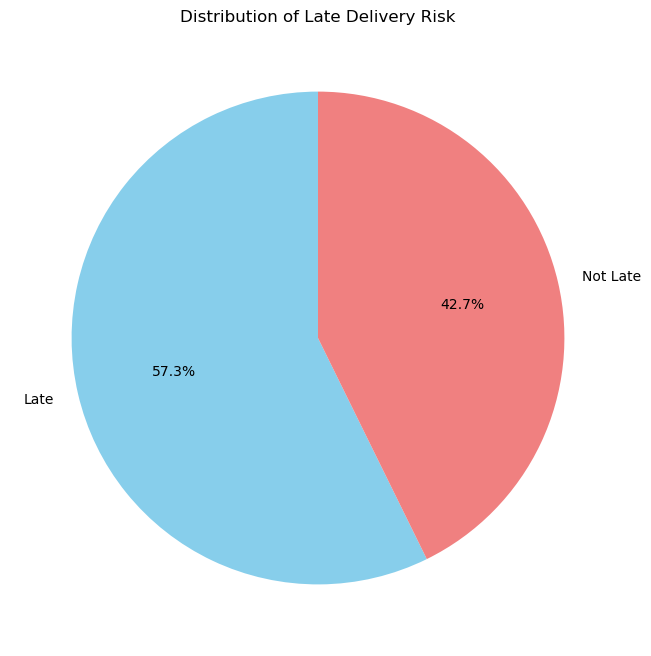

In [150]:
# Count the occurrences of each late delivery risk
late_delivery_counts = sale_data['Late_Delivery_Risk'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(late_delivery_counts, labels=late_delivery_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Late Delivery Risk')

# Show the plot
plt.show()

# ORDER QUANTITY 

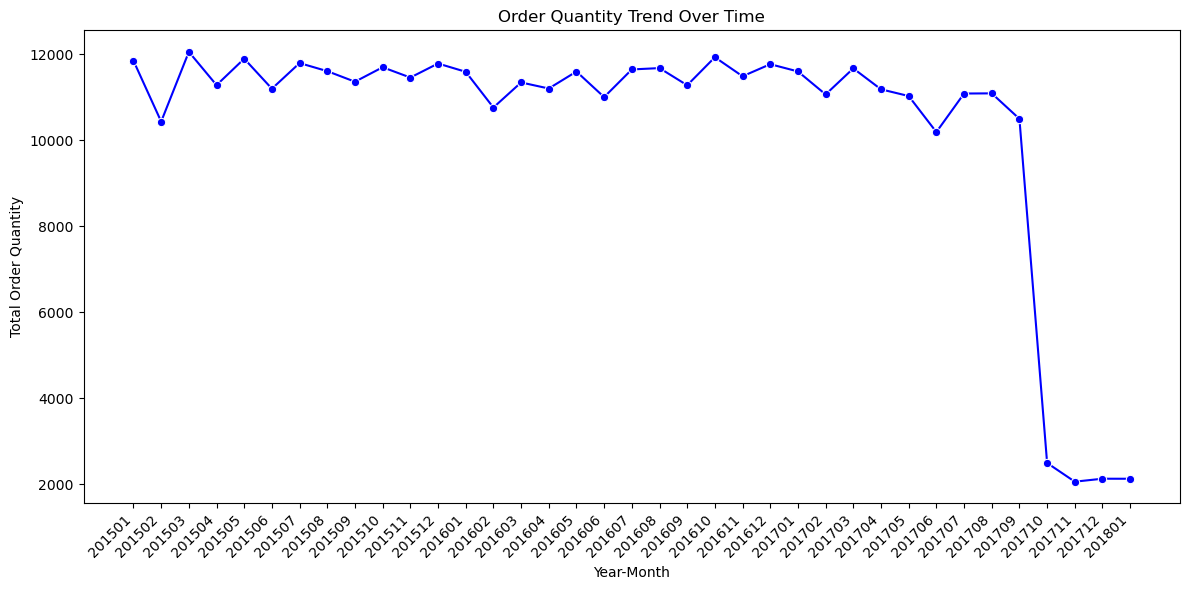

In [165]:
# Extracting year and month from the order date
sale_data['YearMonth'] = sale_data['order_date_(DateOrders)'].dt.strftime('%Y%m')

# Group data by year and month and calculate total order quantity
order_quantity_trend = sale_data.groupby('YearMonth')['Order_Item_Quantity'].sum().reset_index()

# Create a line plot 
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Order_Item_Quantity', data=order_quantity_trend, marker='o', color='blue')
plt.title('Order Quantity Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Order Quantity')

# Show the plot
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


# PROFIT TREND

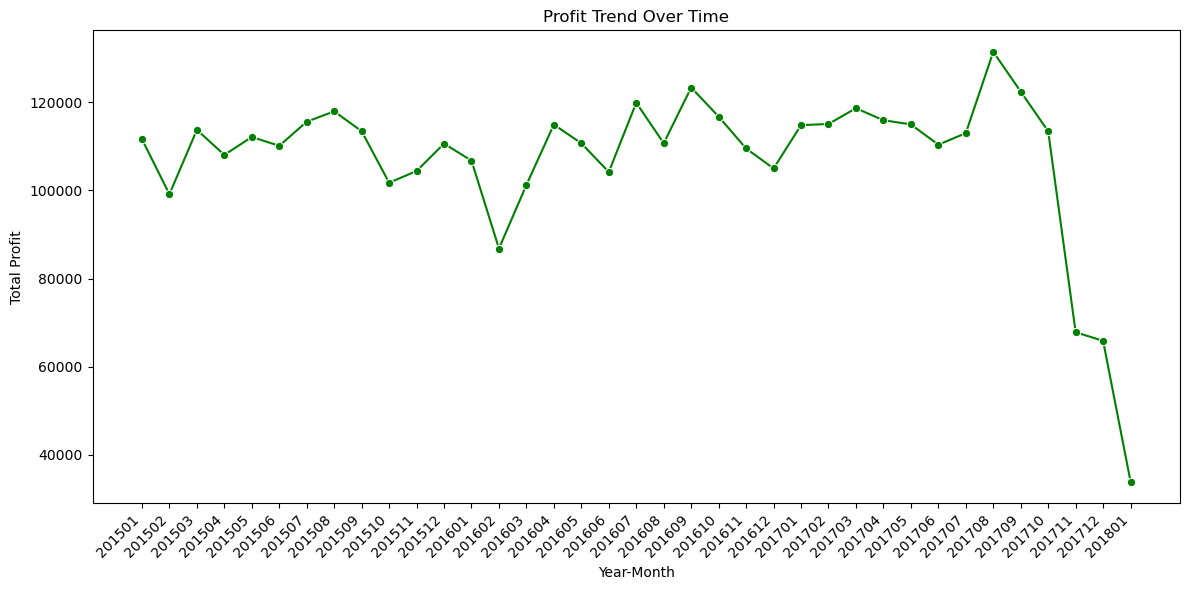

In [177]:
# Group data by year and month and calculate total profit
profit_trend = sale_data.groupby('YearMonth')['Order_Profit_Per_Order'].sum().reset_index()

# Create a line plot using Seaborn  
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Order_Profit_Per_Order', data=profit_trend, marker='o', color='green')
plt.title('Profit Trend Over Time')cv 
plt.xlabel('Year-Month')
plt.ylabel('Total Profit')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# inventory value by class

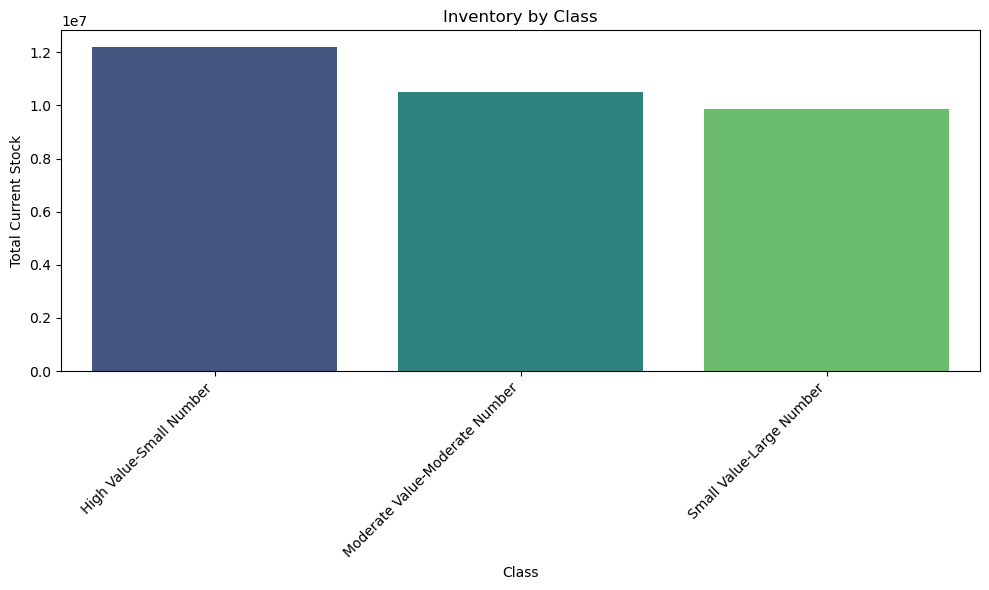

In [183]:
# Group data by class and calculate total current stock
inventory_by_class = df.groupby('Class')['current_stock'].sum().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='current_stock', data=inventory_by_class, palette='viridis')
plt.title('Inventory by Class')
plt.xlabel('Class')
plt.ylabel('Total Current Stock')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# COUNTRY WISE SALES

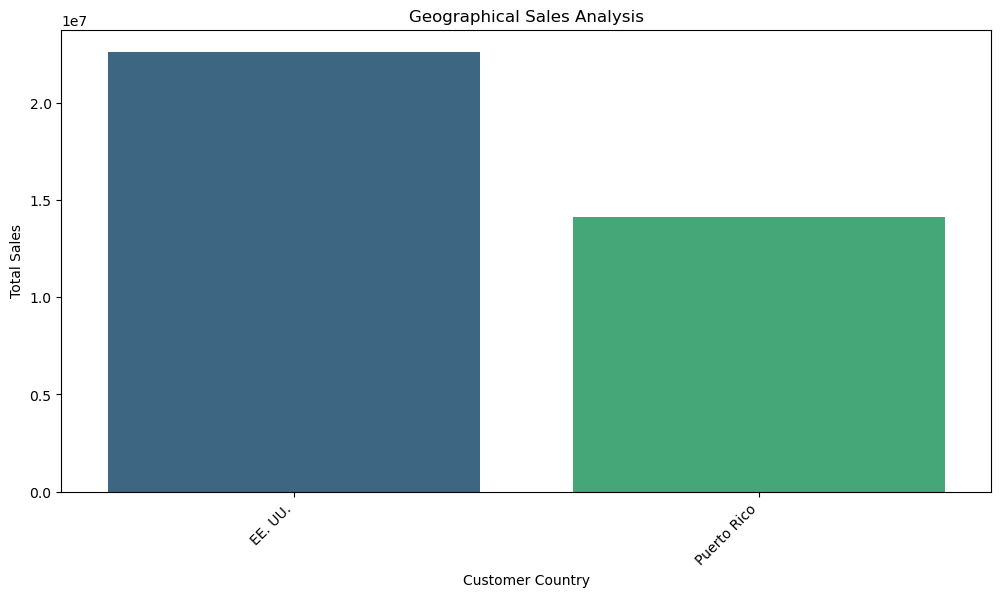

In [188]:
geographical_sales = df.groupby('Customer_Country')['Sales'].sum().sort_values(ascending=False)

# Plot geographical sales
plt.figure(figsize=(12, 6))
sns.barplot(x=geographical_sales.index, y=geographical_sales.values, palette='viridis')
plt.title('Geographical Sales Analysis')
plt.xlabel('Customer Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

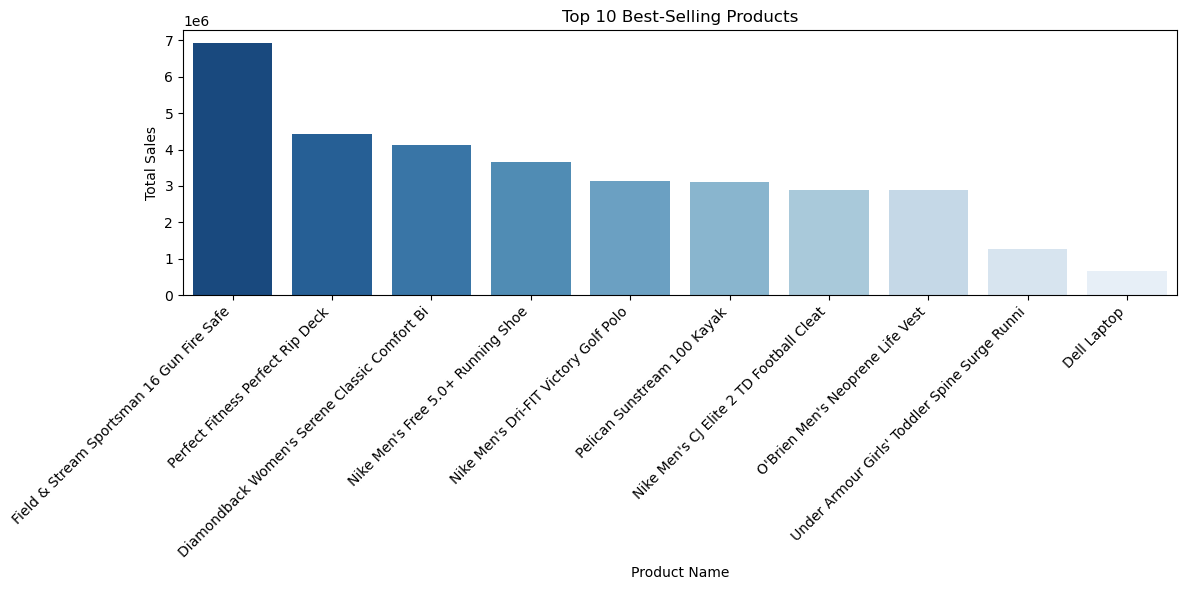

In [189]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Product_Name', y='Sales', data=best_selling_products, palette='Blues_r')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# E.PREDINTING MODEL

Mean Absolute Error: 8.38723311865726
                  Feature  Importance
4      Sales_per_customer    0.844490
3  Order_Profit_Per_Order    0.075571
0             Customer_Id    0.048758
1     Order_Item_Discount    0.017934
2     Order_Item_Quantity    0.013247


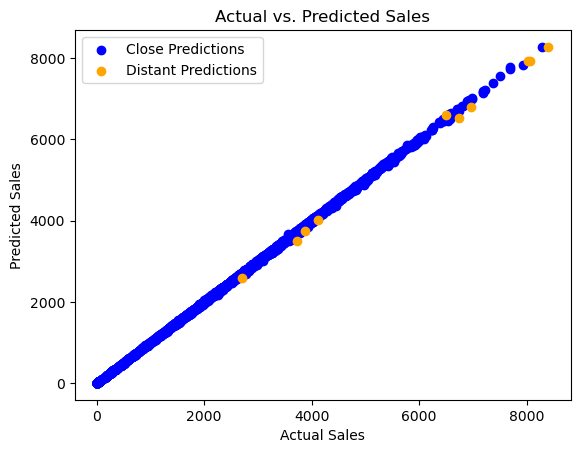

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
sale_data.dropna(inplace=True)

customer_data = sale_data.groupby('Customer_Id').agg({
    'Sales': 'sum',
    'Order_Item_Discount': 'sum',
    'Order_Item_Quantity': 'sum',
    'Order_Profit_Per_Order': 'sum',   
    'Sales_per_customer': 'sum',
    
}).reset_index()

X = customer_data.drop('Sales', axis=1)
y = customer_data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Get feature importances from the trained model
feature_importances = model.feature_importances_ 

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


# Create a mask for points where actual and predicted values are close
mask_close = abs(y_test - y_pred) < 100  # Adjust the threshold as needed

# Plotting actual vs. predicted sales with different colors
plt.scatter(y_test[mask_close], y_pred[mask_close], color='blue', label='Close Predictions')
plt.scatter(y_test[~mask_close], y_pred[~mask_close], color='orange', label='Distant Predictions')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.legend()
plt.show()

In [19]:
import joblib

joblib.dump(model,'SalesModel.pkl')

loaded_model = joblib.load('SalesModel.pkl')

## for downloading the pkl file
from IPython.display import FileLink
FileLink(r'SalesModel.pkl')

C:\Users\lenovo\Downloads\SalesModel.pkl

In [ ]:
import pandas as pd
df=pd.DataFrame()

In [1]:
import numpy as np
import matplotlib as plt
import seaborn as sns 

In [ ]:
df=pd.read_csv 